# Import Important Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"robertspecht","key":"9cdbe068722d0a283c15bea7e0958920"}'}

In [4]:
! mkdir /content/drive/MyDrive/kaggle_skinCancer

In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
 ! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20          10712        224  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           8312        170  1.0              
dataanalyst001/world-population-by-country-2024                     World Population by country 2024                     6KB  2024-07-04 09:47:58           1122         26  1.0              
ihelon/coffee-sales                          

In [14]:
! kaggle competitions list

ref                                                                                     deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2024                                      2024-11-10 23:59:00  Featured         $1,100,000        439           False  
https://www.kaggle.com/competitions/lmsys-chatbot-arena                                 2024-08-05 23:59:00  Research           $100,000       1177           False  
https://www.kaggle.com/competitions/isic-2024-challenge                                 2024-09-06 23:59:00  Research            $80,000        543            True  
https://www.kaggle.com/competitions/leash-BELKA                                         2024-07-08 23:59:00  Featured            $50,000       1976           False  
http

In [15]:
! kaggle competitions download -c 'isic-2024-challenge'

 99% 1.99G/2.00G [00:20<00:00, 104MB/s] 
100% 2.00G/2.00G [00:20<00:00, 104MB/s]


In [16]:
! unzip isic-2024-challenge.zip -d /content/drive/MyDrive/kaggle_skinCancer/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874656.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874659.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874663.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874742.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874751.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874803.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874805.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874832.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874878.jpg  
  inflating: /content/drive/MyDrive/kaggle_skinCancer/train-image/image/ISIC_9874897.jpg  
  inflating: /content/drive/MyDrive/kag

In [17]:

! pip install h2o
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# H2O
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=f3f39a7ec0105a6055530cdfee0df85bfee246d5515ddd2a4771536be5425567
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o


In [18]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# random seed
my_random_seed = 1

# aesthetics
default_color_1 = 'blue'
default_color_2 = 'green'
default_color_3 = 'red'

In [19]:
# load data
df_train = pd.read_csv('/content/drive/MyDrive/kaggle_skinCancer/train-metadata.csv', low_memory=False)
df_test = pd.read_csv('/content/drive/MyDrive/kaggle_skinCancer/test-metadata.csv', low_memory=False)
df_sub = pd.read_csv('/content/drive/MyDrive/kaggle_skinCancer/sample_submission.csv')

In [20]:
df_train.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [21]:
df_train.shape

(401059, 55)

In [22]:
df_test.shape

(3, 44)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   patient_id                   3 non-null      object 
 2   age_approx                   3 non-null      float64
 3   sex                          3 non-null      object 
 4   anatom_site_general          3 non-null      object 
 5   clin_size_long_diam_mm       3 non-null      float64
 6   image_type                   3 non-null      object 
 7   tbp_tile_type                3 non-null      object 
 8   tbp_lv_A                     3 non-null      float64
 9   tbp_lv_Aext                  3 non-null      float64
 10  tbp_lv_B                     3 non-null      float64
 11  tbp_lv_Bext                  3 non-null      float64
 12  tbp_lv_C                     3 non-null      float64
 13  tbp_lv_Cext             

In [25]:
df_train.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,60.996869,42.289976,51.199529,8.539975,19.084517,1.070408,5.054760,1.368691,-8.909552,9.455766,7.538922,0.741238,2.539773,38.520265,3.451523,3.091590,11.878891,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,5.631909,10.864572,12.100527,9.679312,5.357863,0.762918,2.642928,2.215871,3.463362,3.466703,2.404951,0.143857,1.173169,41.480936,1.724557,2.044813,5.919302,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,28.436490,4.223007,17.702260,0.431601,10.761634,0.000000,-13.819850,-18.088106,-38.756140,2.952675,3.001138,0.027667,0.273973,0.000000,0.589426,0.000000,2.579237,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,57.297630,34.303345,42.274506,4.109589,15.426205,0.574909,3.413108,0.111030,-10.675470,6.952377,5.748160,0.656627,1.812707,0.109819,2.143836,1.728774,8.338364,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,61.109173,42.343770,51.425557,5.685870,17.423950,0.931402,4.643926,1.593945,-8.132223,8.699932,6.946320,0.768215,2.265201,14.408514,2.996933,2.764664,10.015440,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,64.905025,50.405051,60.495607,9.119910,21.011340,1.412154,6.274246,2.850638,-6.397103,11.243486,8.748403,0.853175,2.905918,87.791395,4.358399,4.120246,13.209100,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,130.983300,87.548888,98.588250,334.152700,87.205340,9.952932,32.137590,12.643930,-1.590631,39.197720,30.487456,0.974960,18.387900,100.000000,10.000000,10.000000,102.493900,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [26]:
df_test.describe()

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,48.333333,2.793333,21.235613,16.534205,30.055107,27.650733,36.939135,32.498746,54.900061,59.695153,40.234463,46.871437,3.121286,20.443077,0.237461,4.701409,2.404372,-6.636973,7.209592,6.124481,0.828647,1.580365,7.590582e-02,4.575493,0.621704,7.952809,0.178523,1.211260,46.871437,0.423880,51.666667,-117.242387,1148.245296,23.461588
std,15.275252,0.330051,4.037983,5.955101,1.508777,0.679182,1.795292,2.930254,6.153928,9.525959,17.875819,19.118920,0.895504,2.148809,0.230883,2.123160,1.258232,1.417283,1.693005,0.698937,0.143078,0.579789,1.170750e-01,0.765336,0.578214,1.531253,0.158981,0.113509,19.118920,0.056670,50.579970,35.636913,461.012045,78.683844
min,35.000000,2.520000,16.648670,9.657964,28.384120,27.043640,35.467806,29.169579,51.220960,53.505430,24.979850,31.114600,2.120473,18.957821,0.000000,2.797056,1.340481,-8.236981,6.041092,5.446997,0.664465,1.032666,8.052259e-13,3.968912,0.000000,6.340311,0.000000,1.080308,31.114600,0.366071,20.000000,-155.065100,629.535889,-28.576050
25%,40.000000,2.610000,19.726500,14.797672,29.423900,27.283979,35.938953,31.404790,51.347845,54.210420,30.399650,36.236620,2.758491,19.211110,0.125618,3.556761,1.709957,-7.185864,6.238824,5.765193,0.779621,1.276726,8.490520e-03,4.145556,0.360870,7.235590,0.115371,1.176124,36.236620,0.396150,22.500000,-133.717170,966.756944,-21.797669
50%,45.000000,2.700000,22.804330,19.937380,30.463680,27.524318,36.410100,33.640000,51.474730,54.915410,35.819450,41.358640,3.396510,19.464400,0.251236,4.316465,2.079433,-6.134747,6.436557,6.083388,0.894776,1.520786,1.698104e-02,4.322201,0.721739,8.130868,0.230742,1.271940,41.358640,0.426230,25.000000,-112.369240,1303.978000,-15.019287
75%,55.000000,2.930000,23.529085,19.972325,30.890600,27.954279,37.674800,34.163330,56.739612,62.790014,47.861770,54.749856,3.621693,21.185705,0.356192,5.653585,2.936317,-5.836969,7.793842,6.463223,0.910737,1.854215,1.138587e-01,4.878783,0.932557,8.759058,0.267784,1.276736,54.749856,0.452784,67.500000,-98.331030,1407.600000,49.480406
max,65.000000,3.160000,24.253840,20.007270,31.317520,28.384240,38.939500,34.686660,62.004494,70.664619,59.904090,68.141071,3.846876,22.907010,0.461149,6.990705,3.793202,-5.539191,9.151127,6.843057,0.926698,2.187644,2.107364e-01,5.435366,1.143374,9.387248,0.304827,1.281532,68.141071,0.479339,110.000000,-84.292820,1511.222000,113.980100


In [28]:
df_train.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [29]:
# define features and target

# categorical
features_cat =['sex', 'anatom_site_general', 'image_type', 'tbp_tile_type','tbp_lv_location', 'tbp_lv_location_simple', 'attribution', 'copyright_license']

# numerical
features_num = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext','tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext',
                'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
                'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
                'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
                'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']

# target
target = 'target'

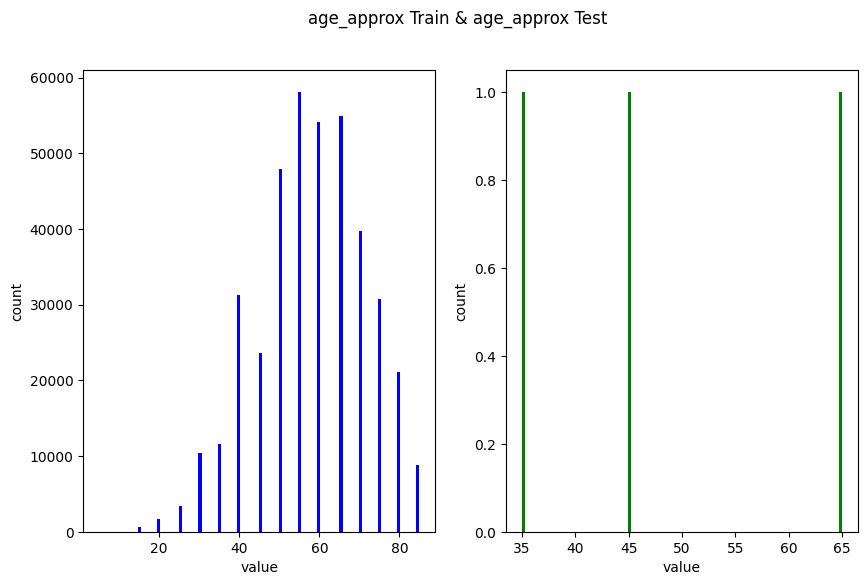

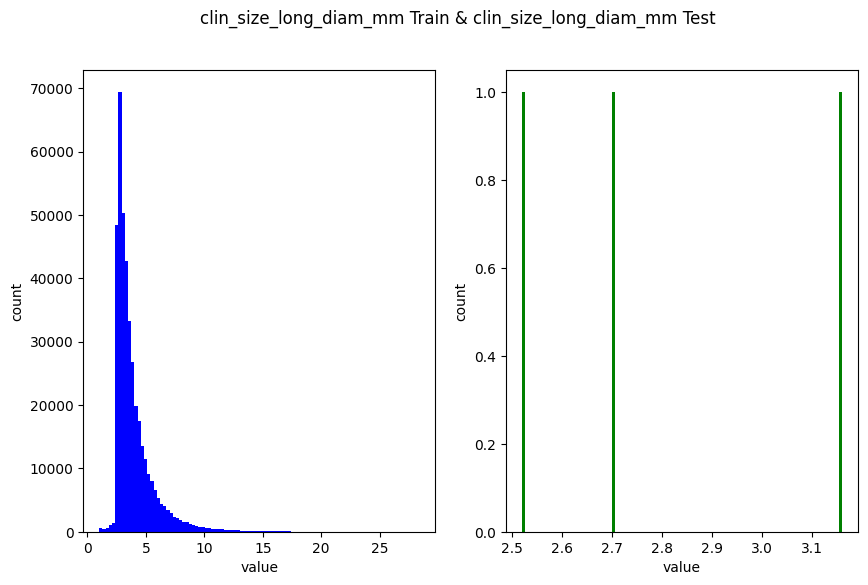

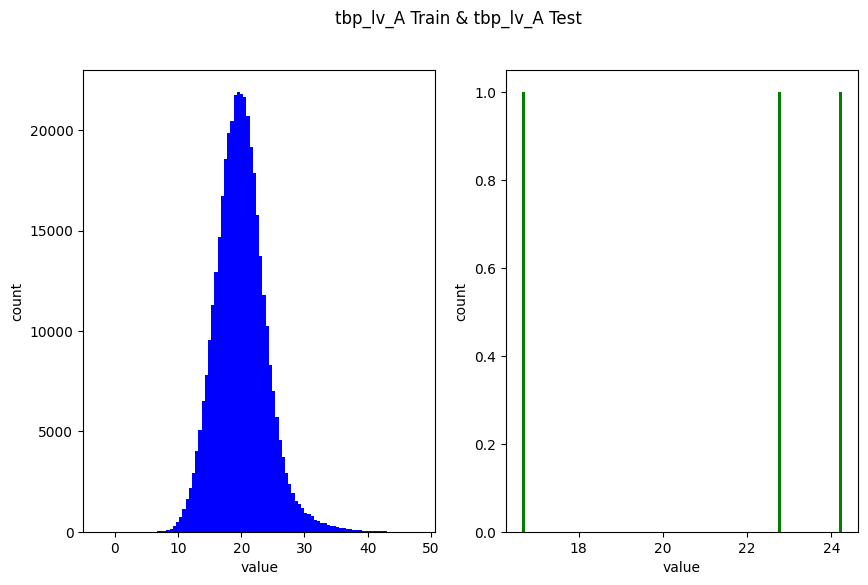

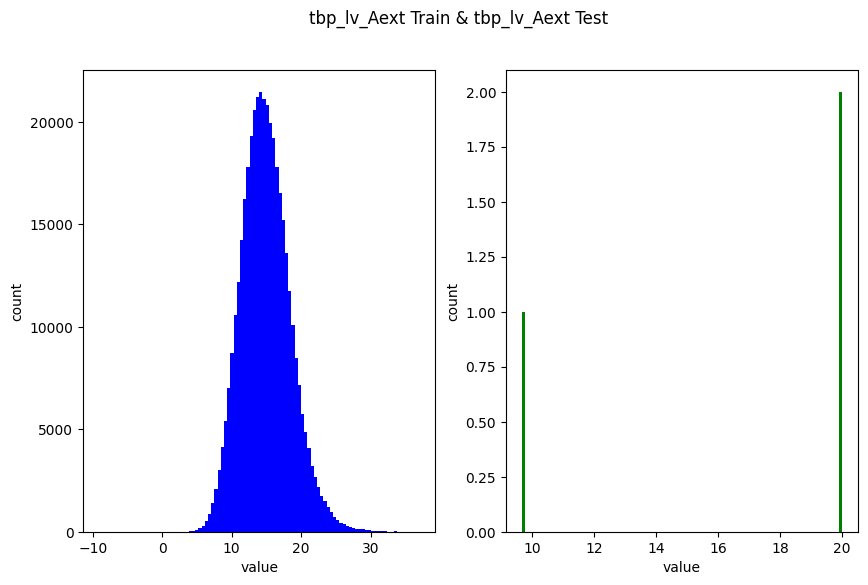

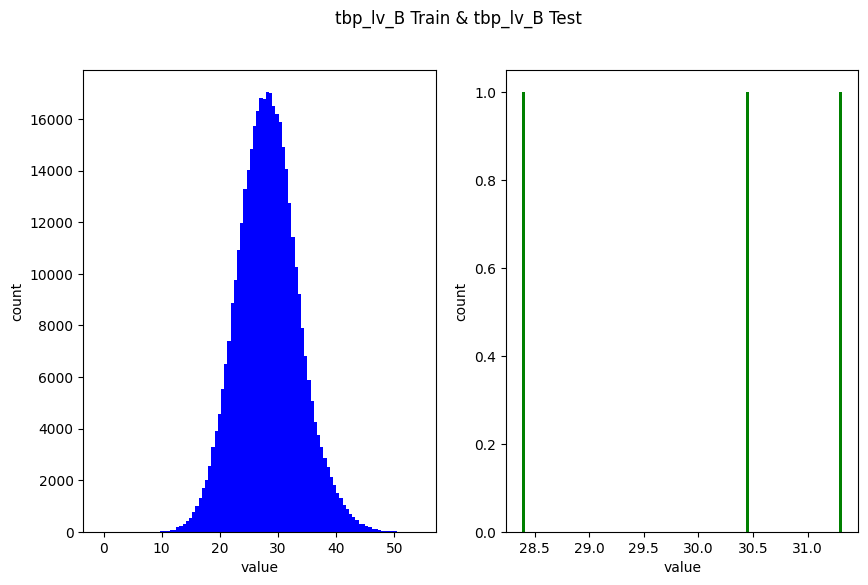

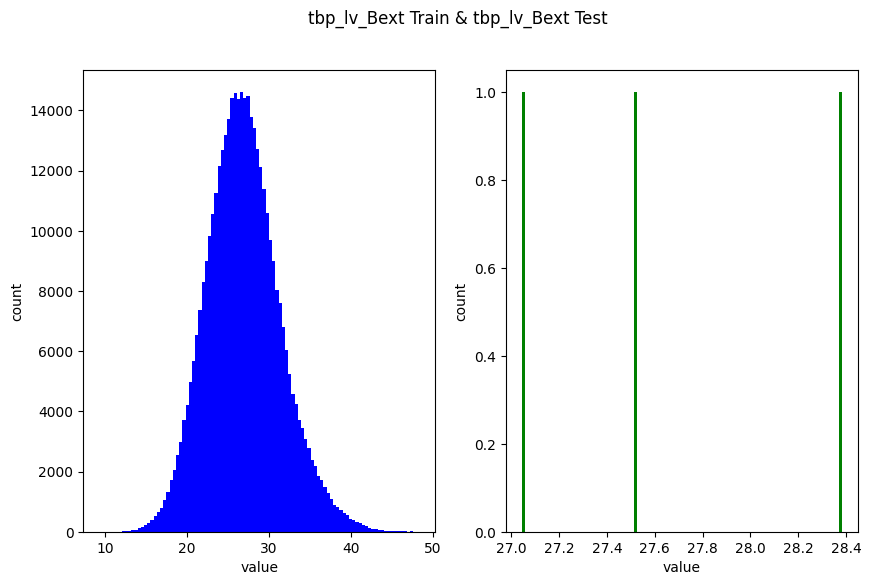

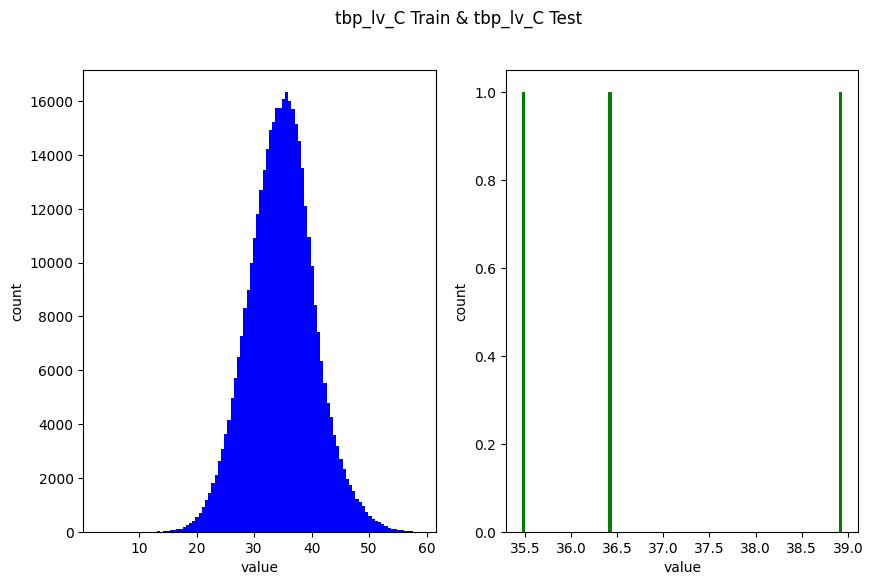

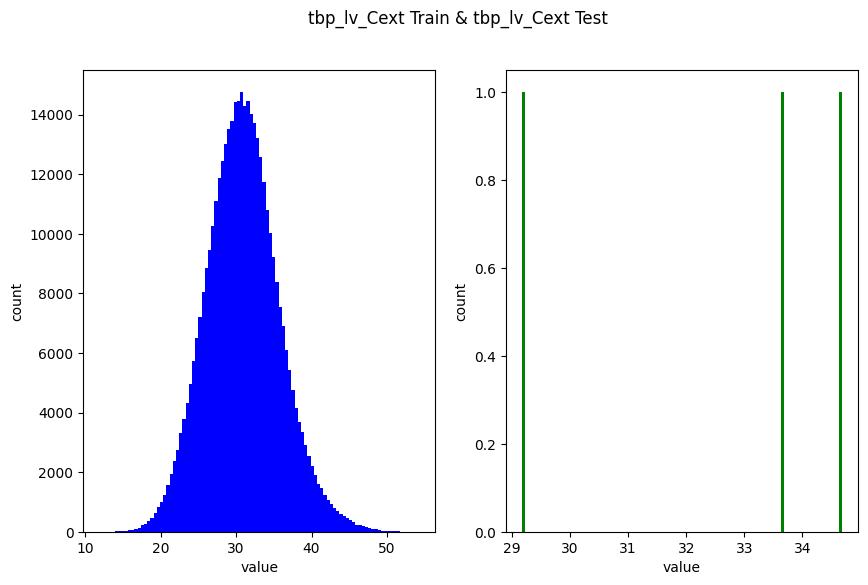

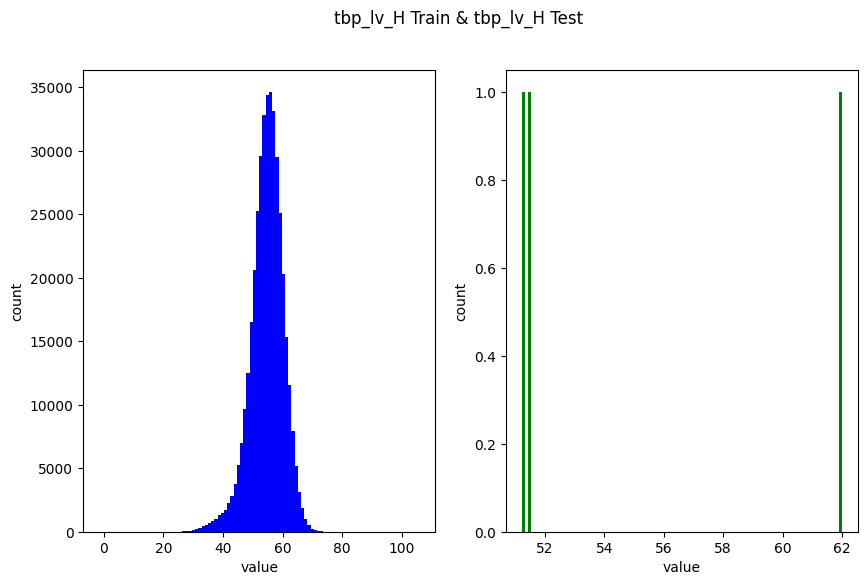

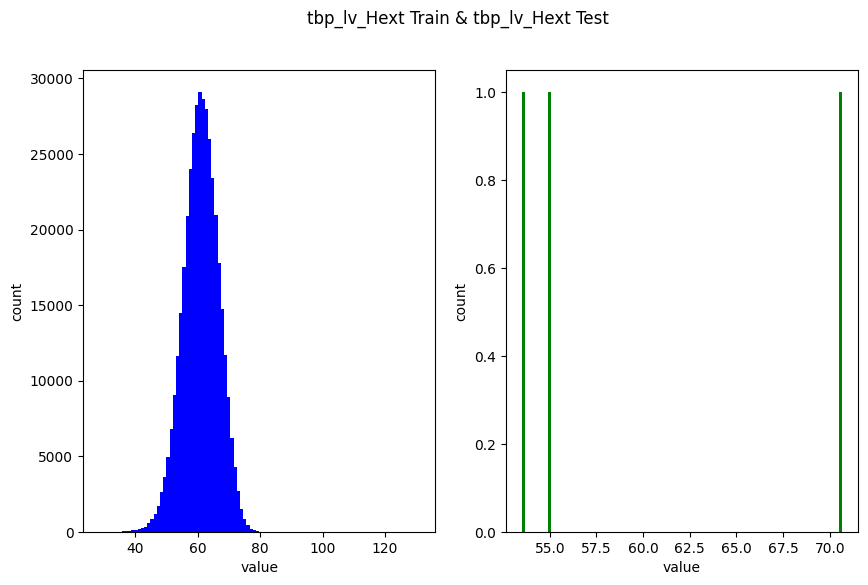

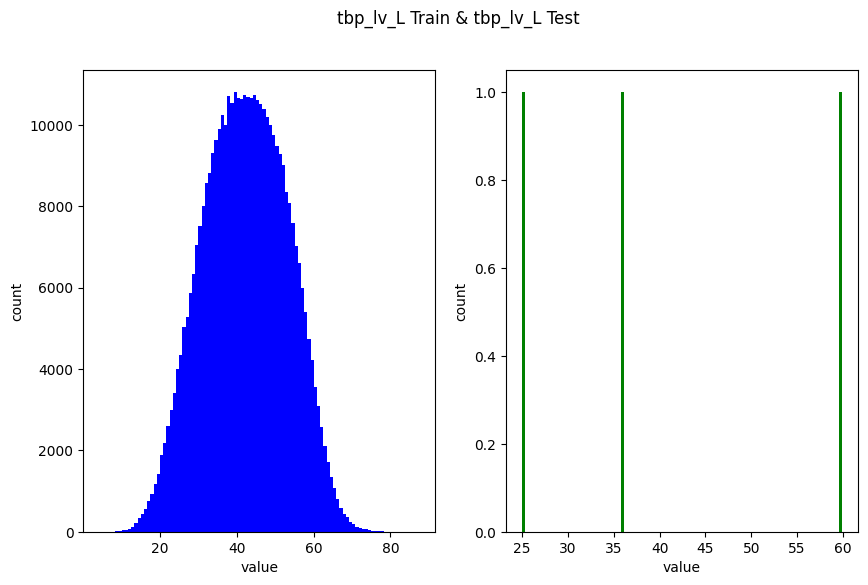

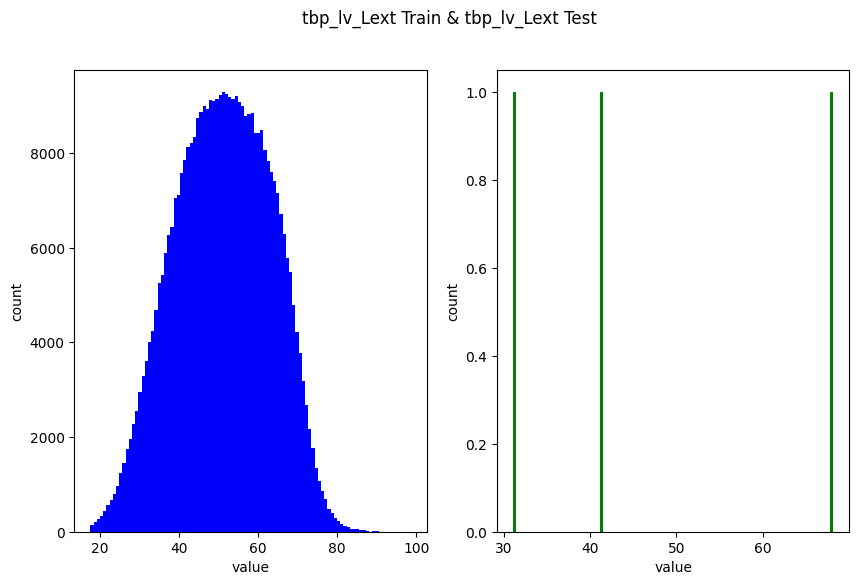

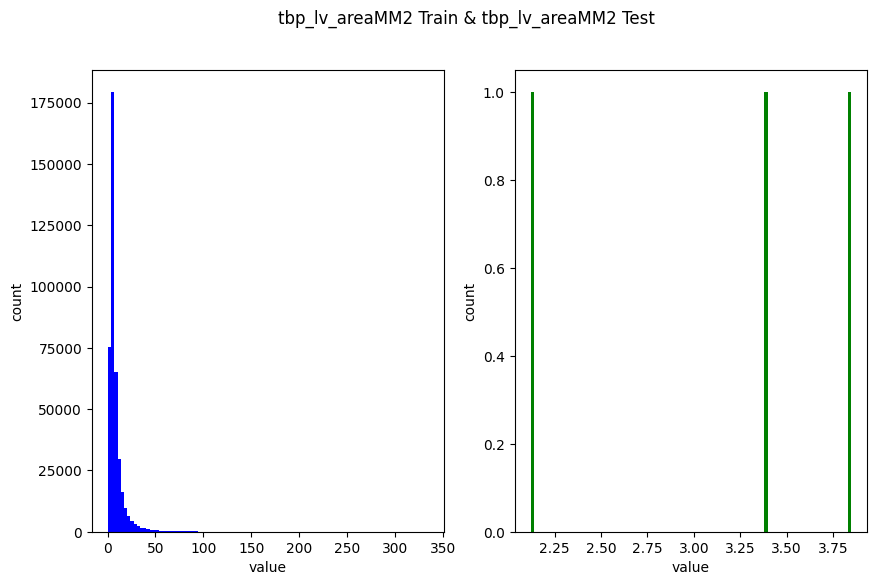

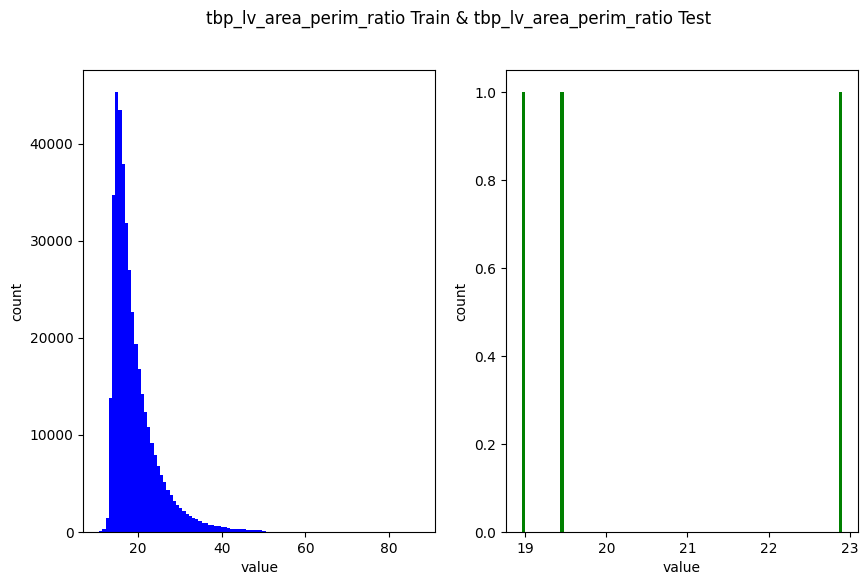

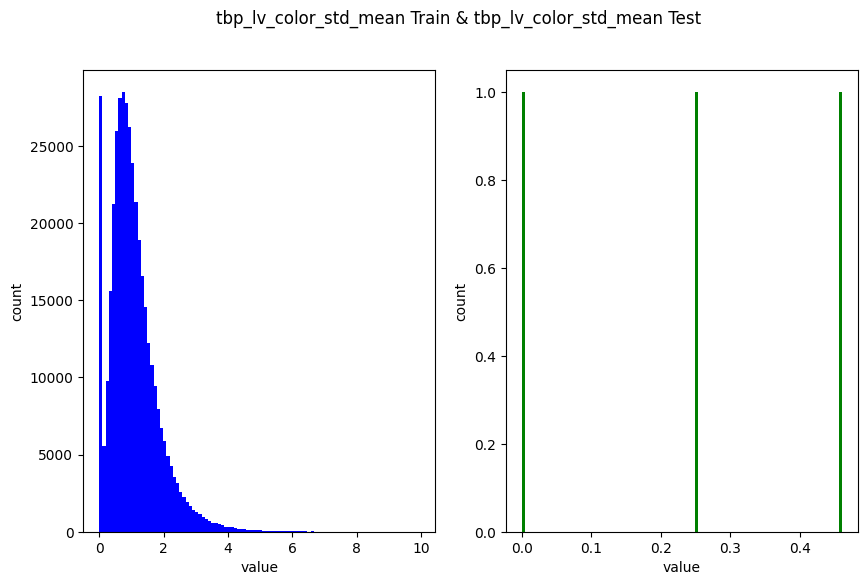

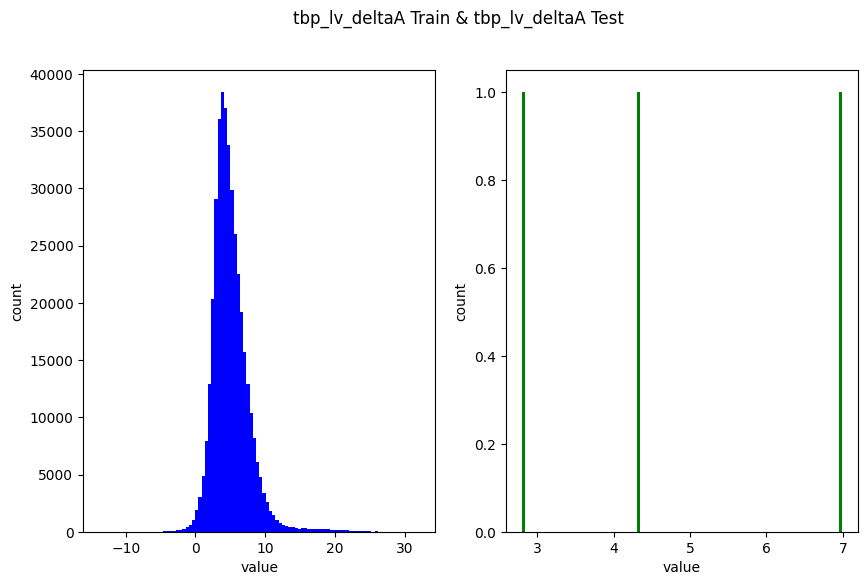

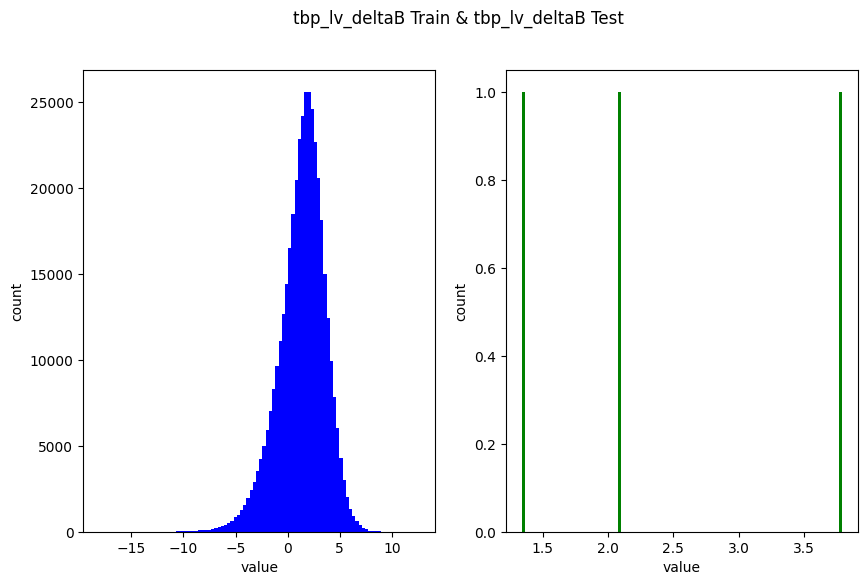

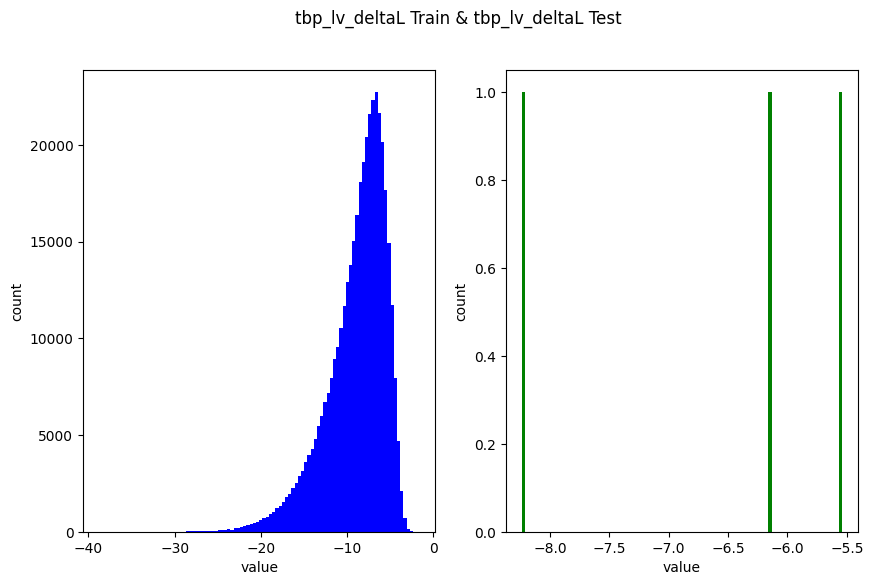

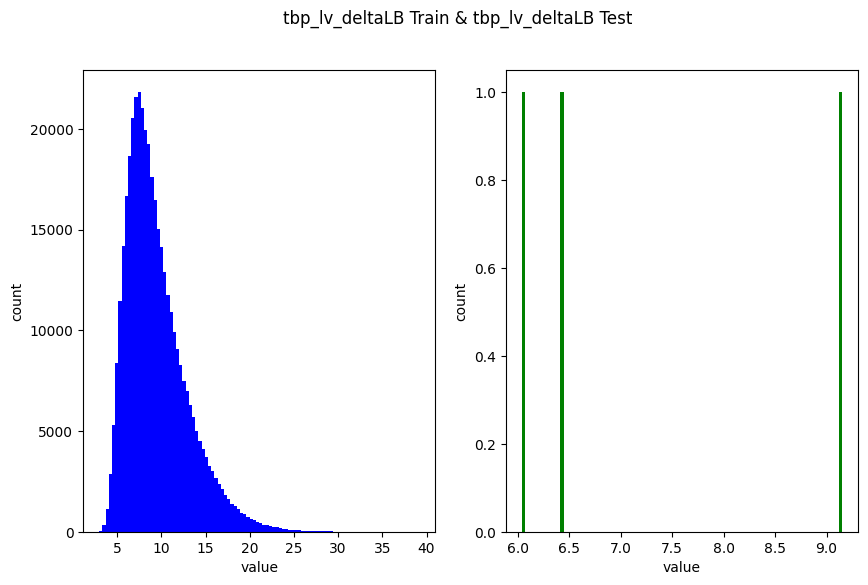

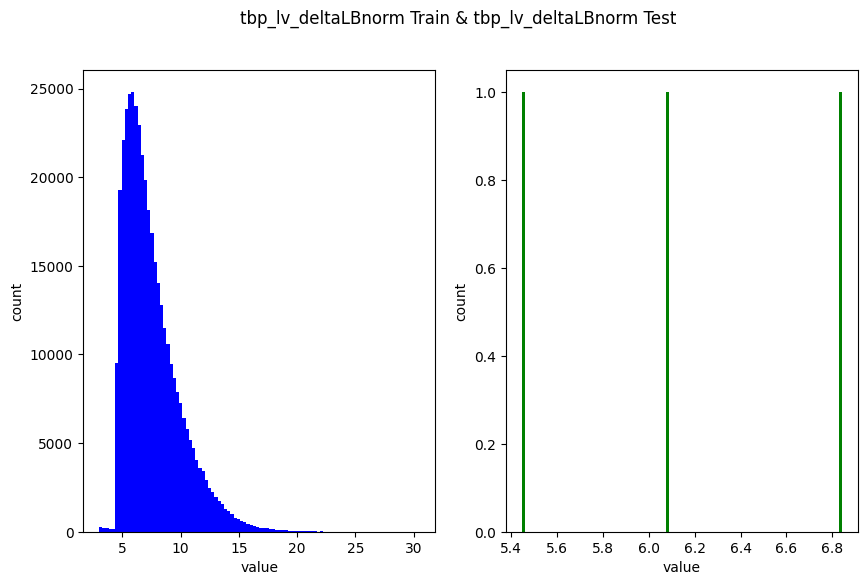

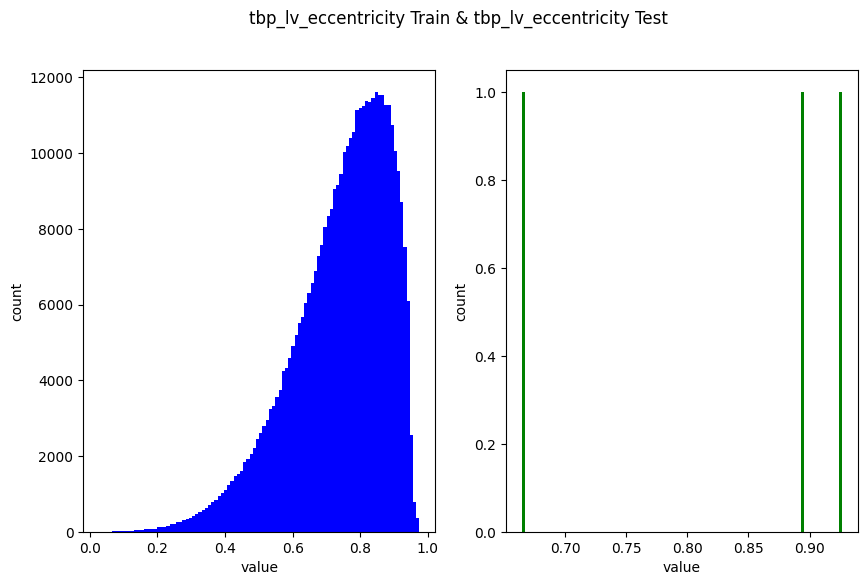

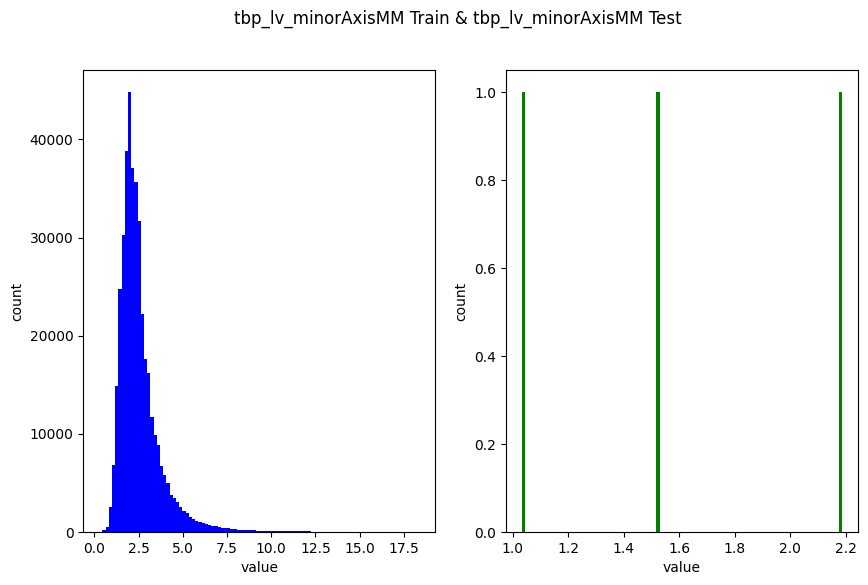

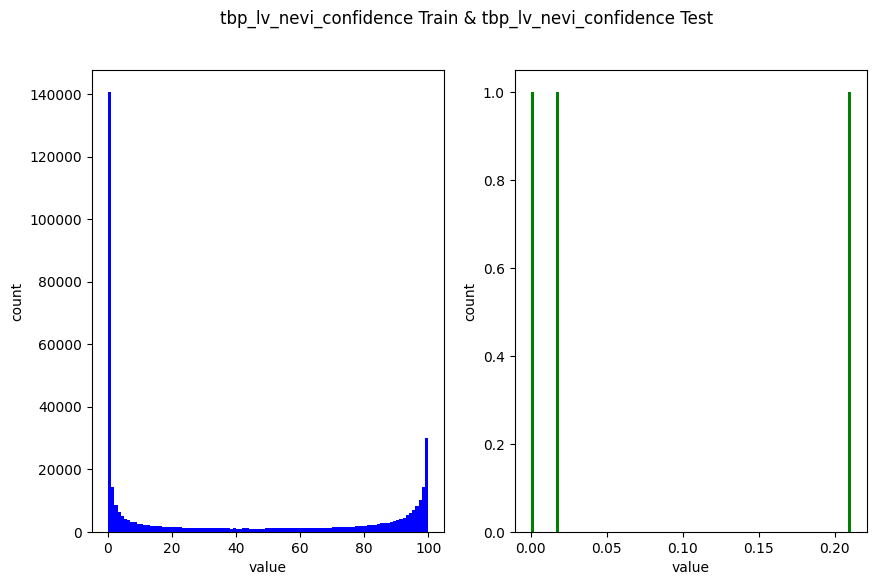

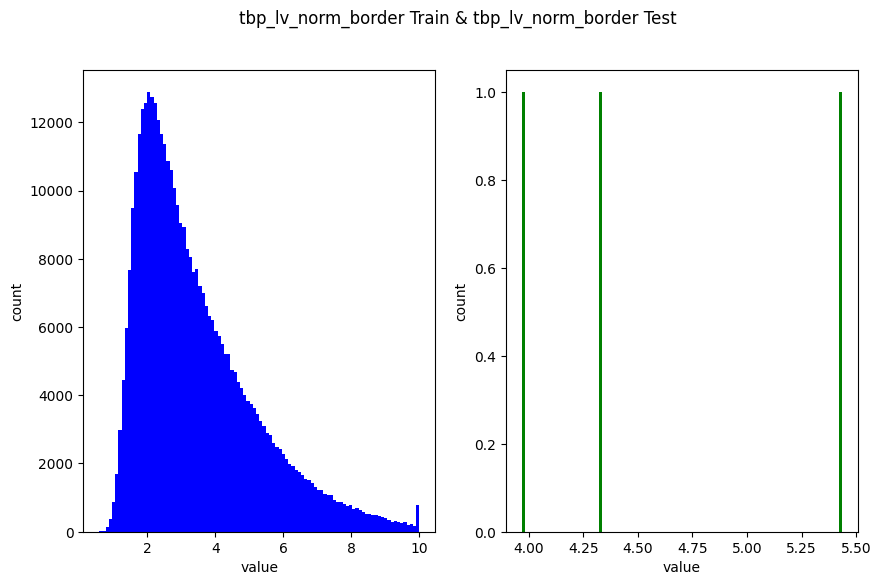

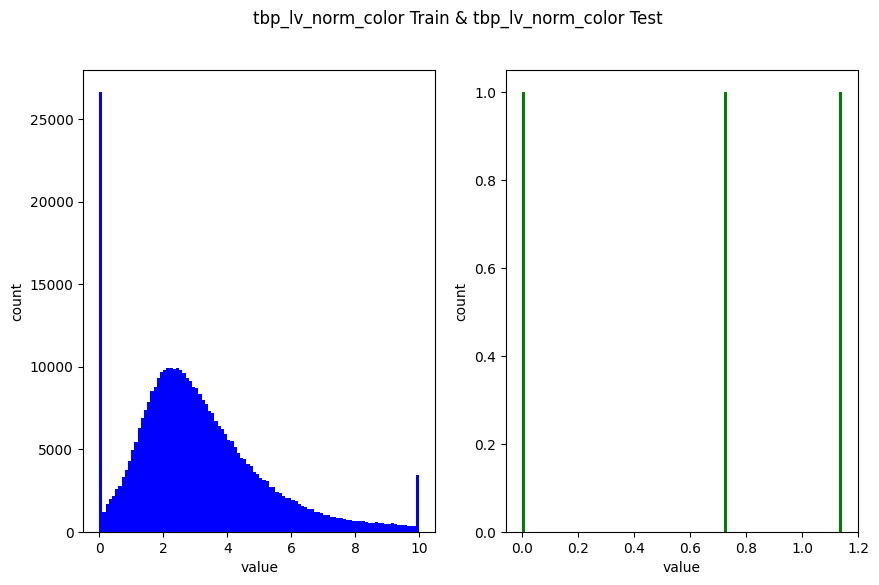

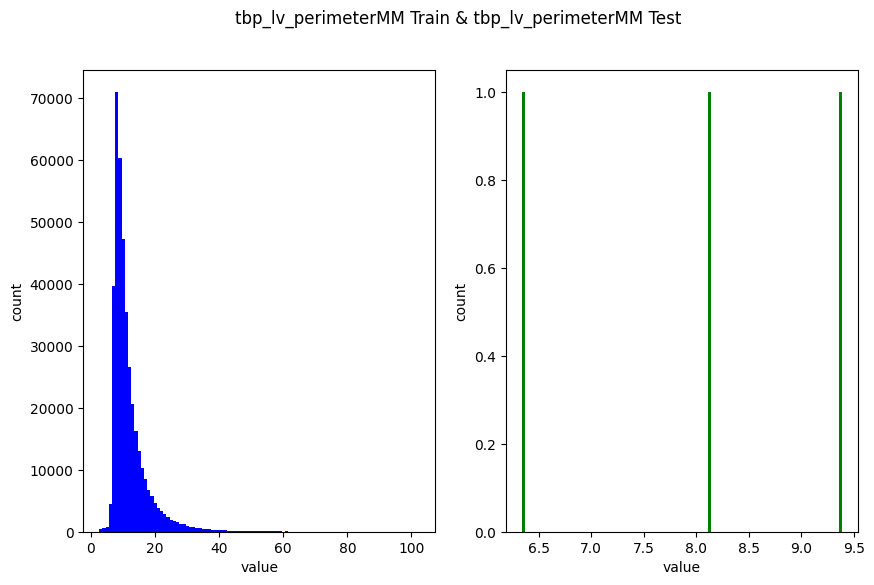

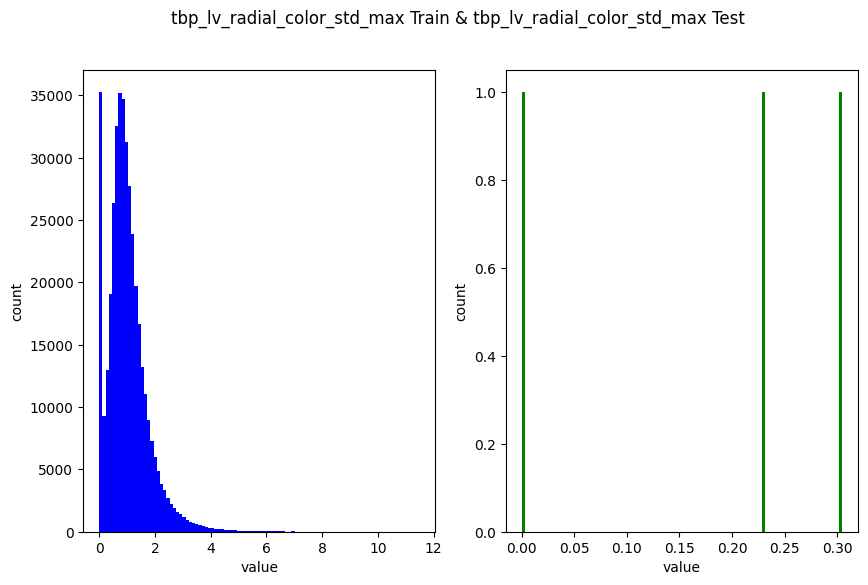

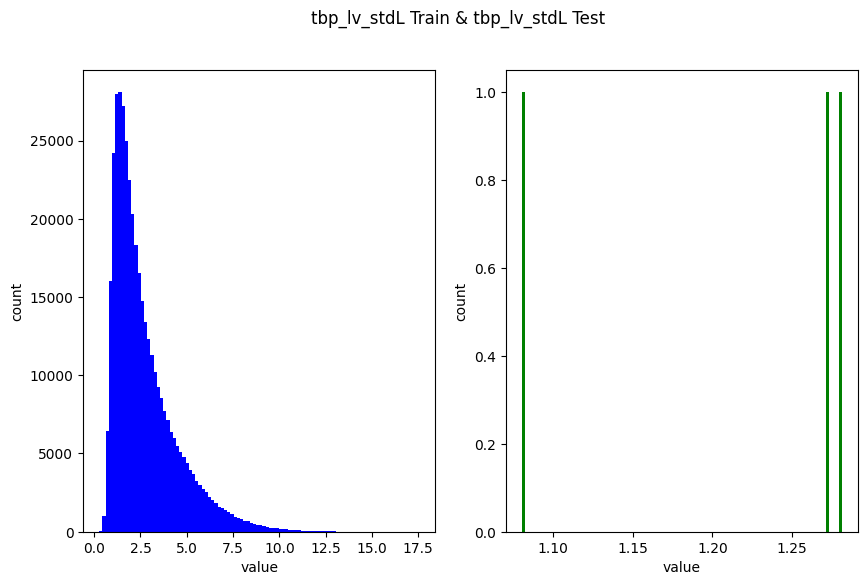

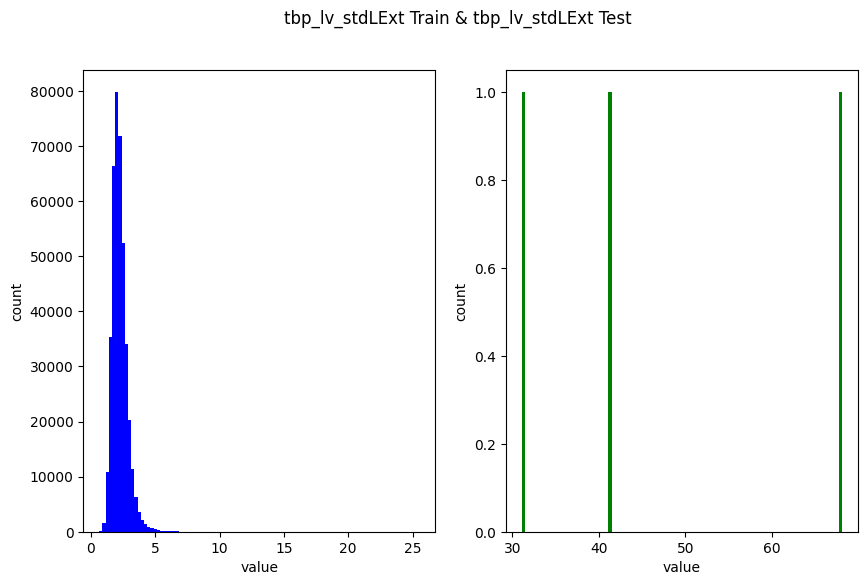

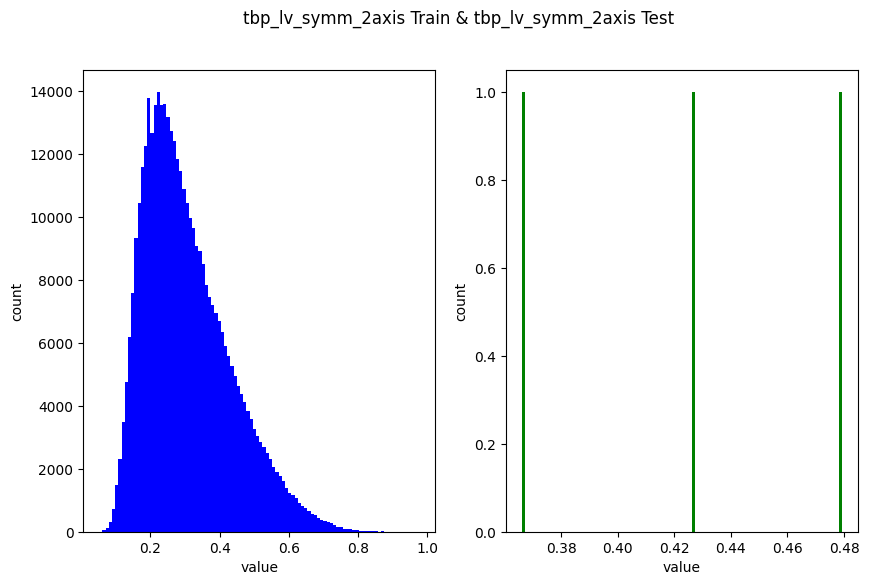

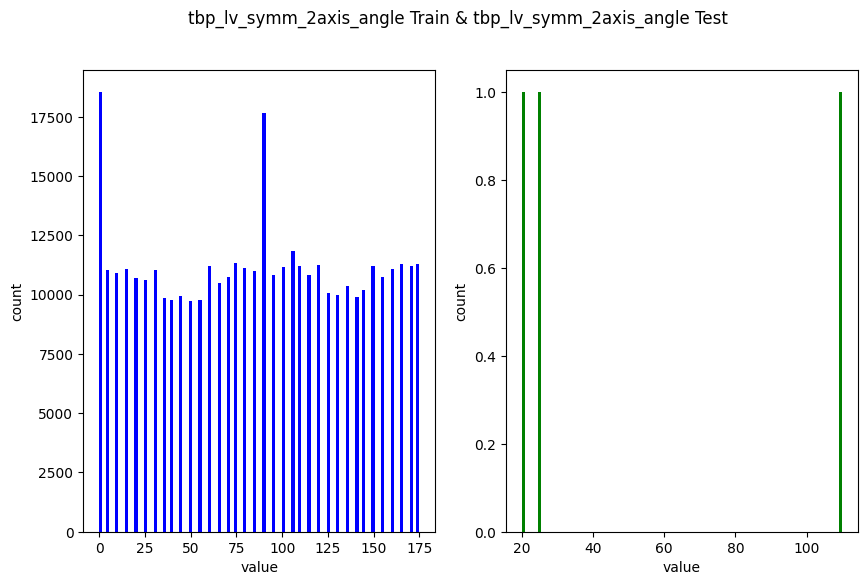

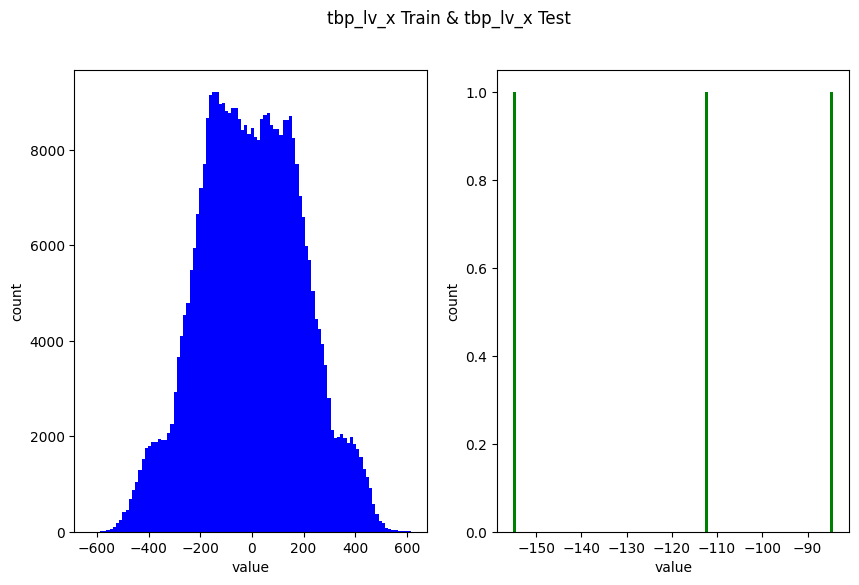

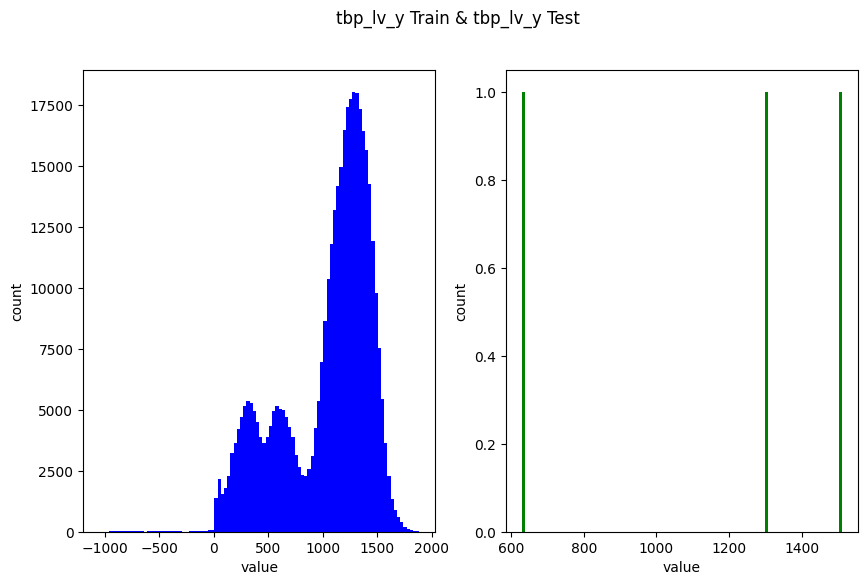

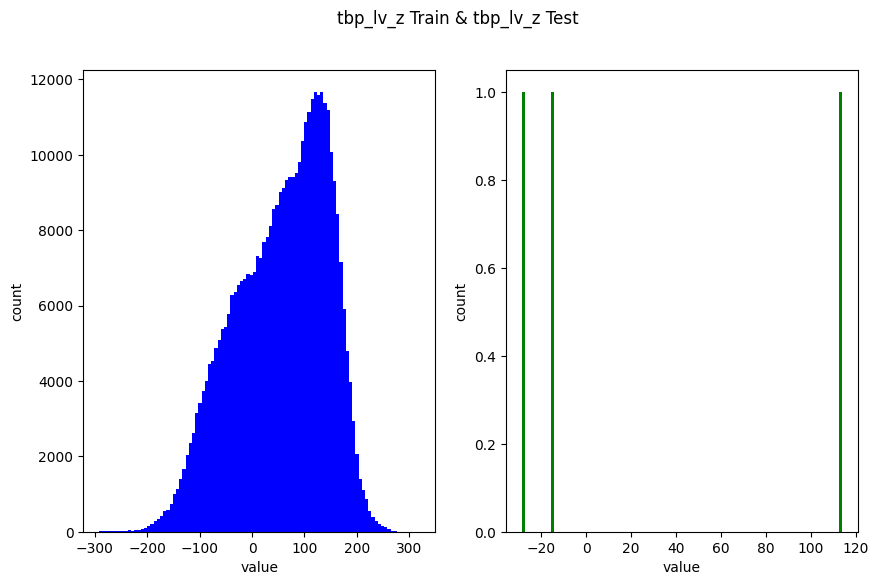

In [56]:
for feature in features_num:
  plt.figure(figsize = (10,6))
  plot1 = plt.subplot(1,2,1)
  plot1.hist(df_train[feature],bins =100, color=default_color_1)
  plot1.figure.suptitle(feature + ' Train & ' + feature + ' Test')
  plot1.set(xlabel = 'value', ylabel = 'count')
  plot2 = plt.subplot(1,2,2)
  plot2.hist(df_test[feature],bins =100, color=default_color_2)
  plot2.set(xlabel = 'value', ylabel = 'count')
  plt.show()
  print()
  print()



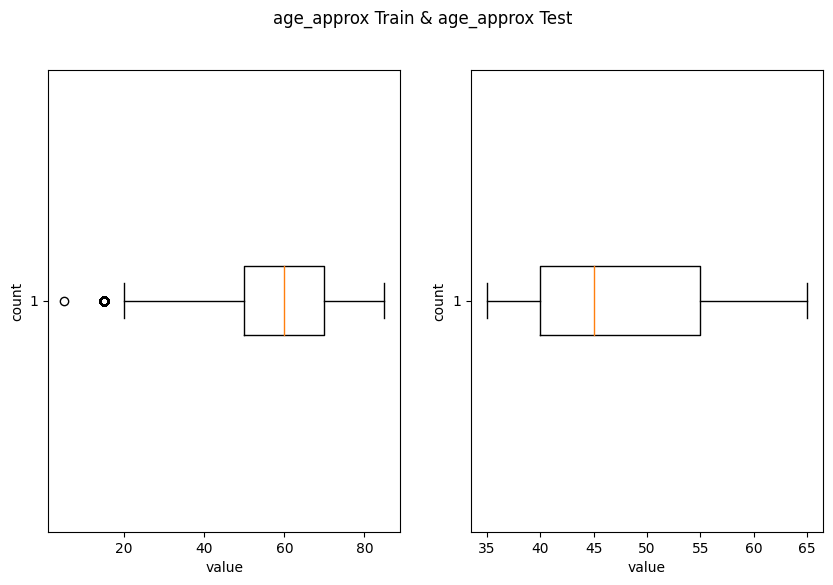

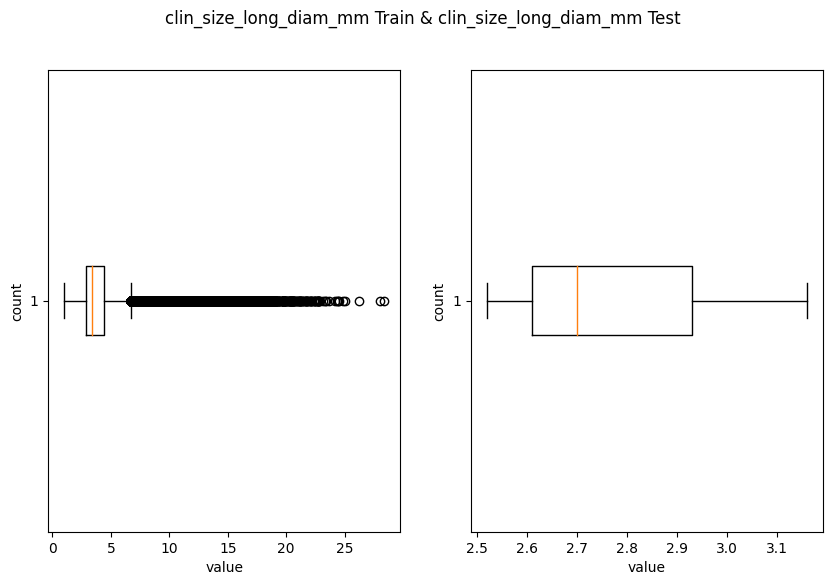

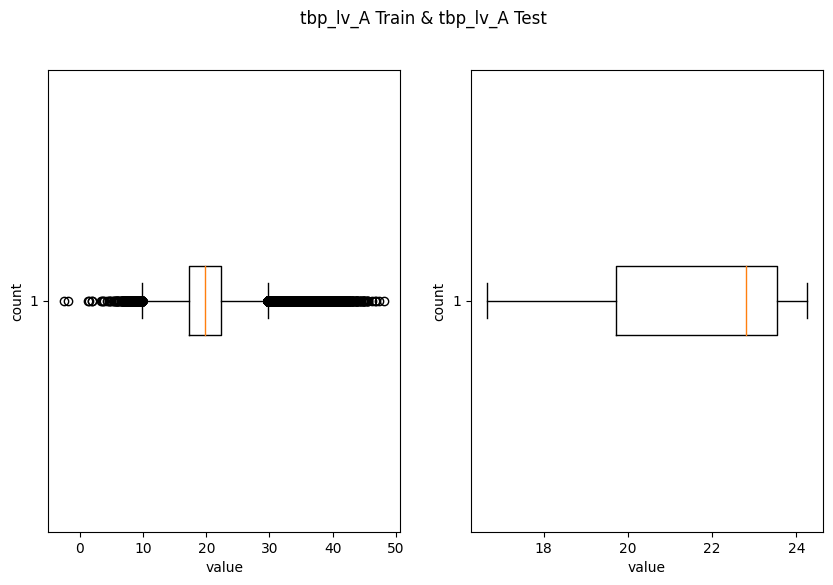

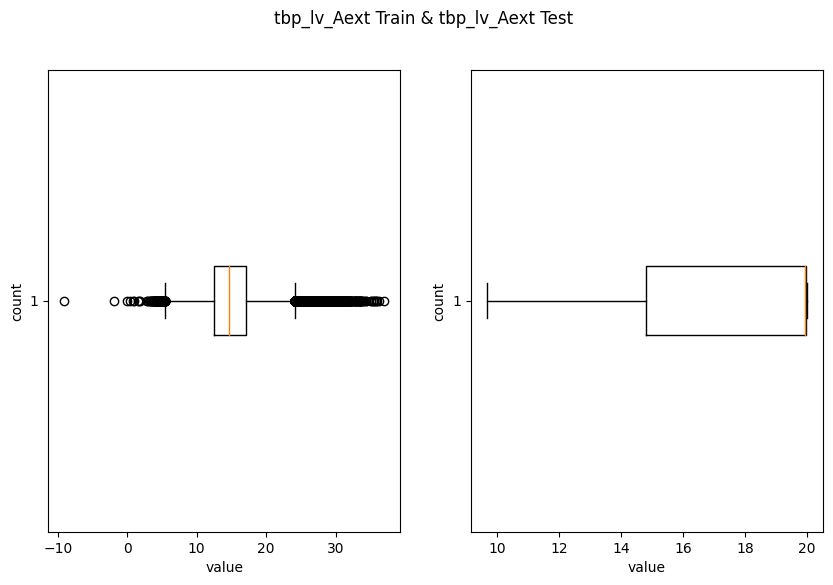

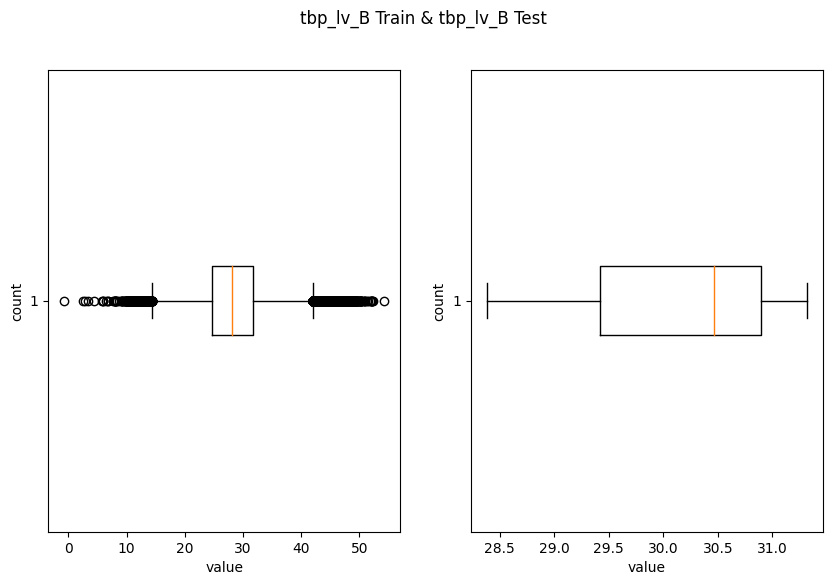

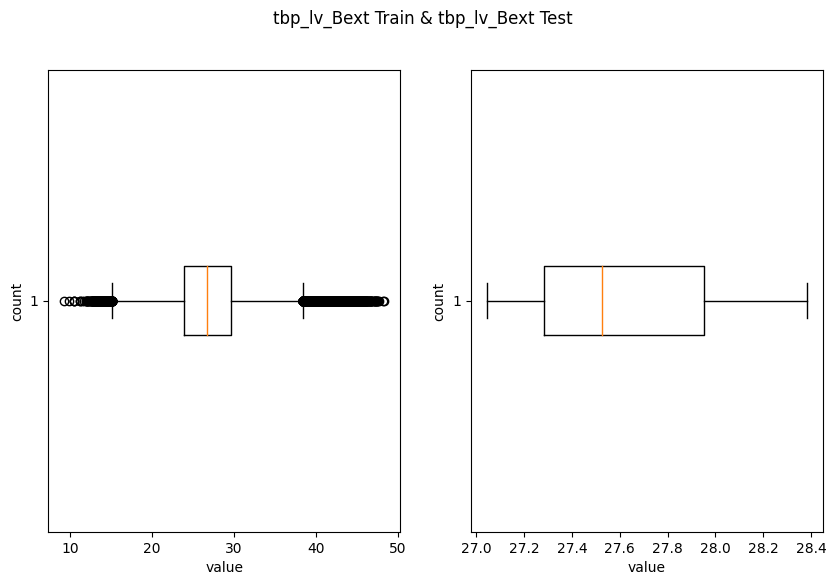

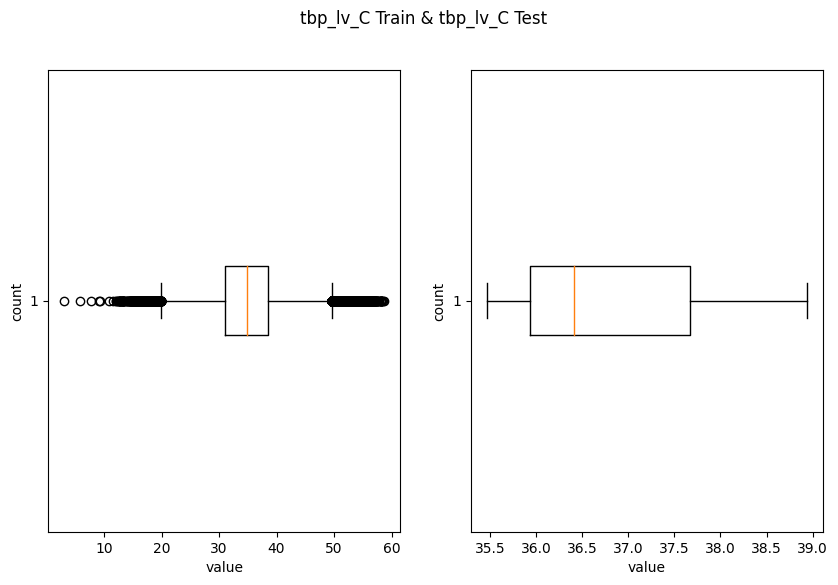

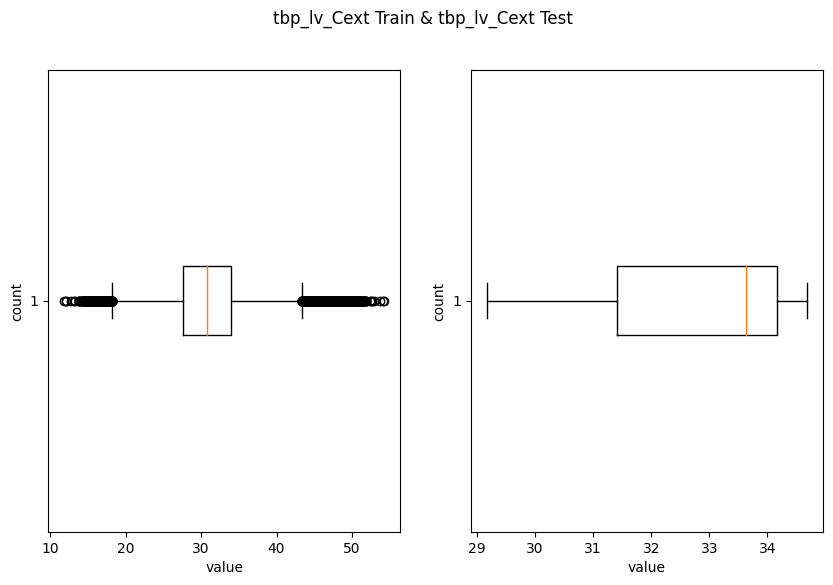

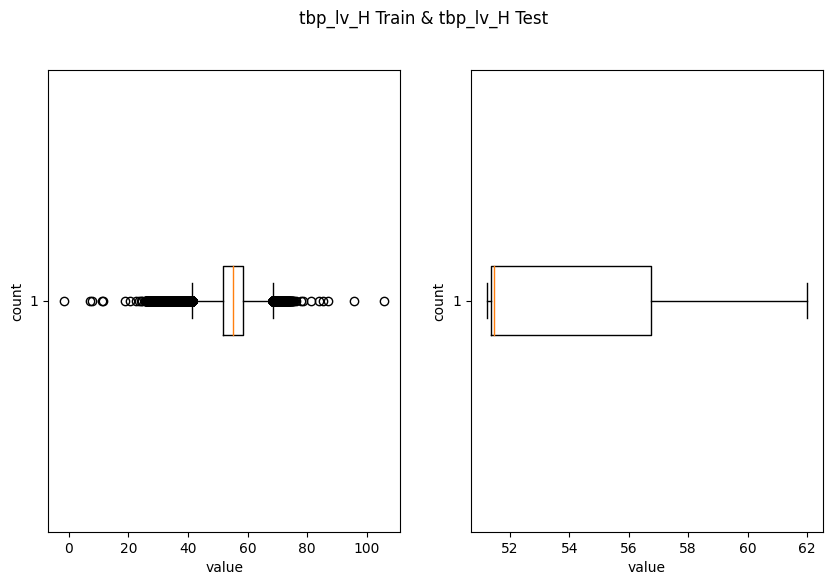

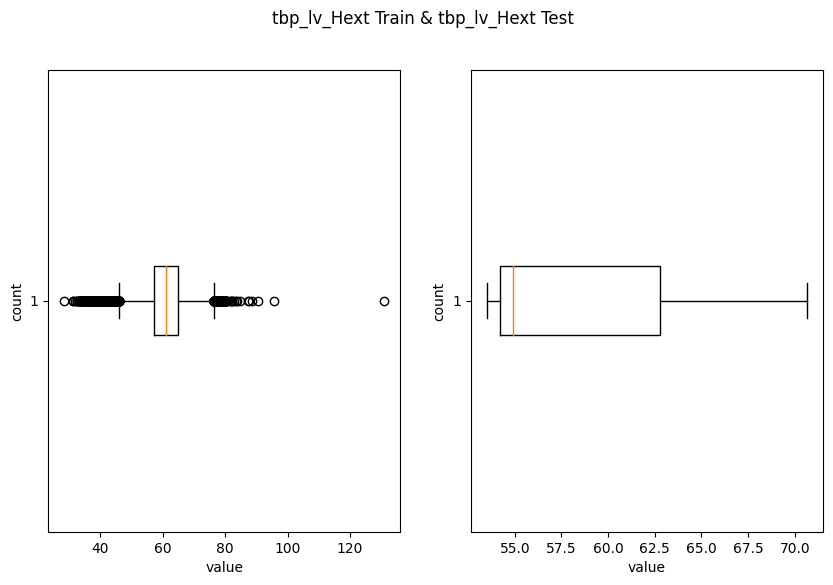

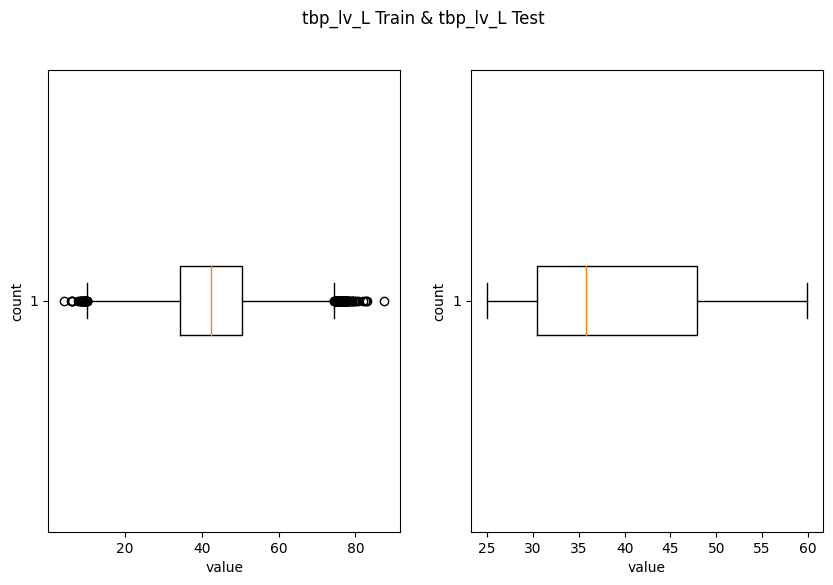

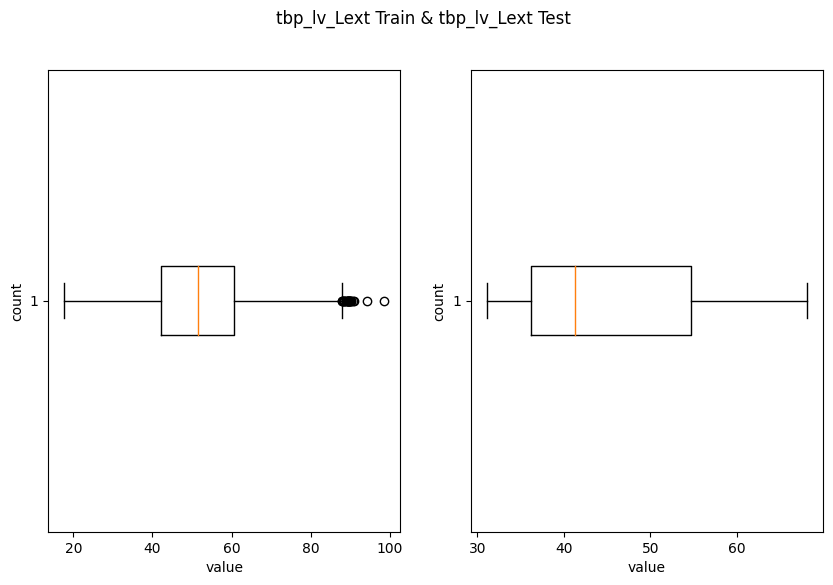

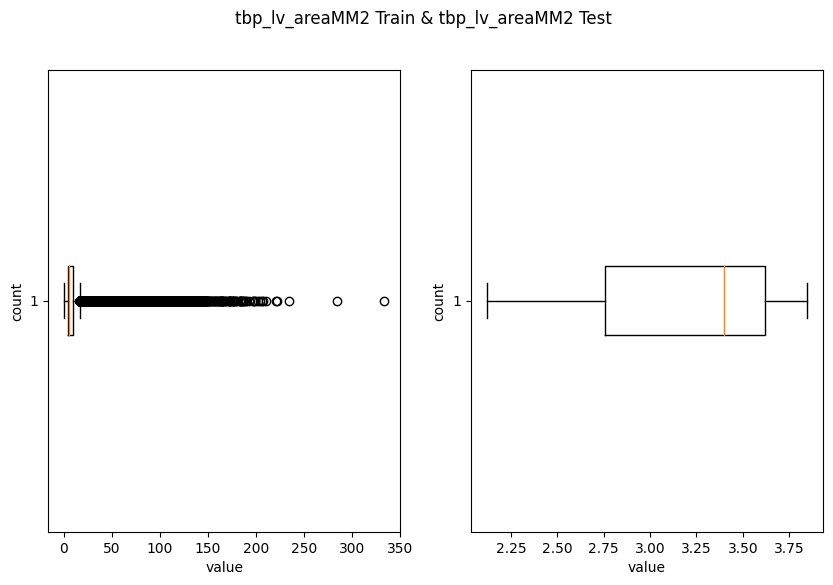

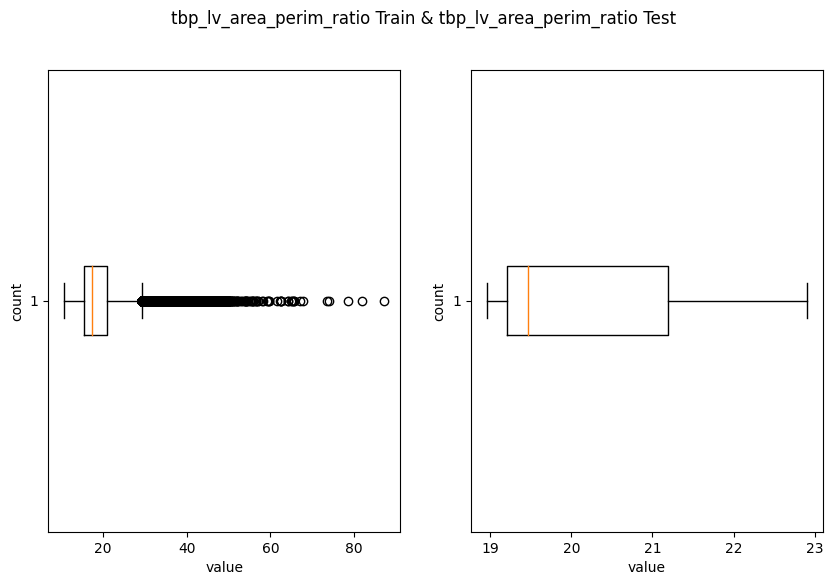

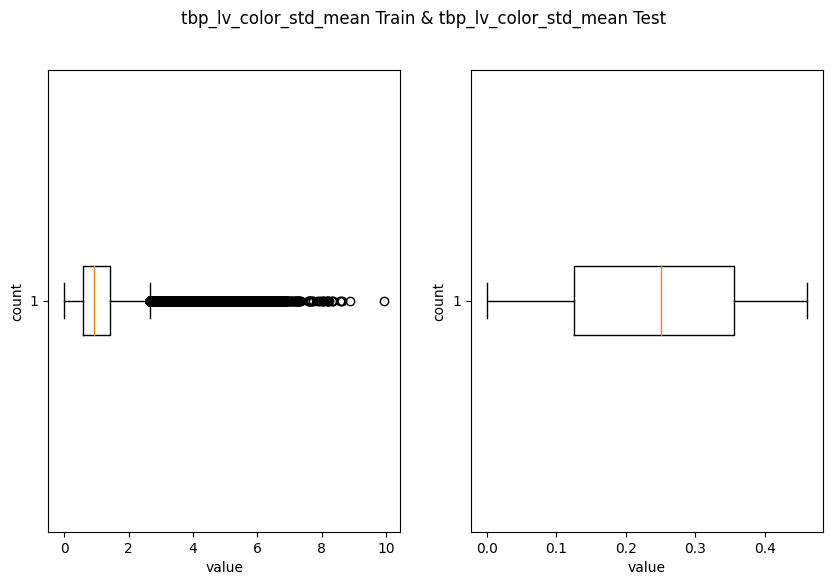

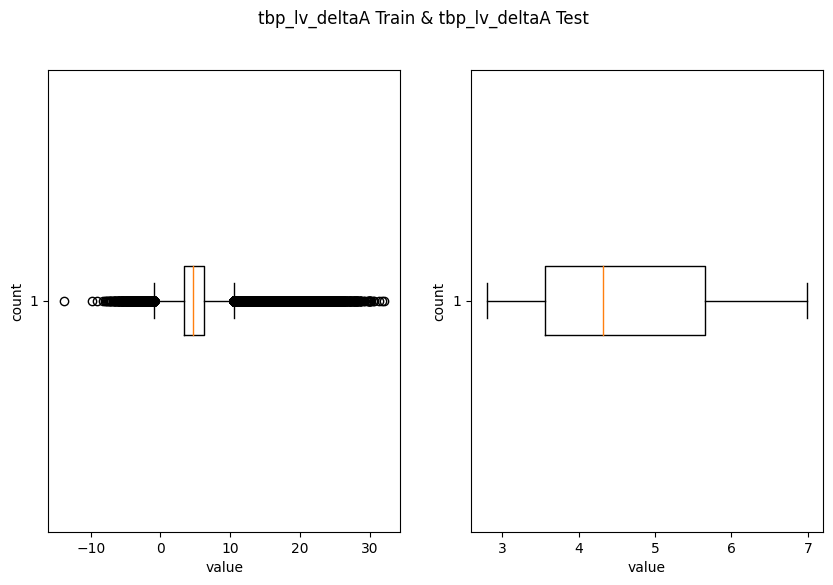

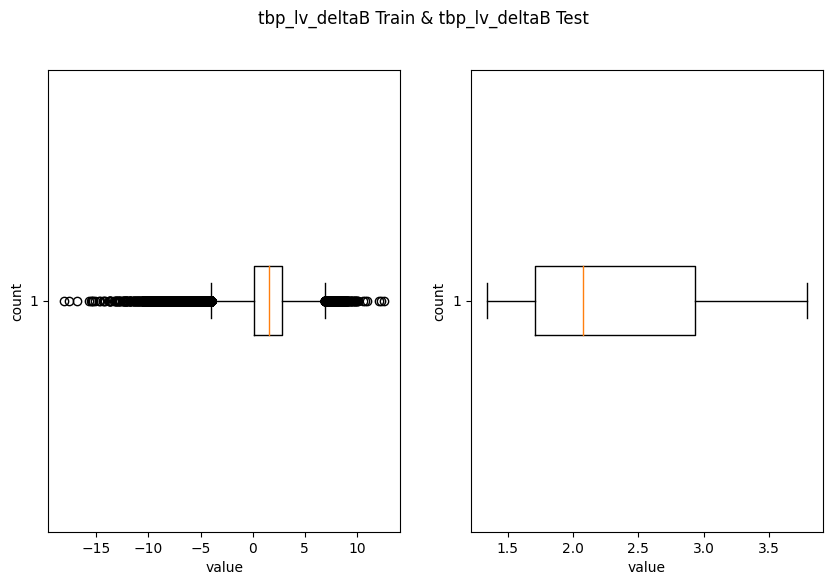

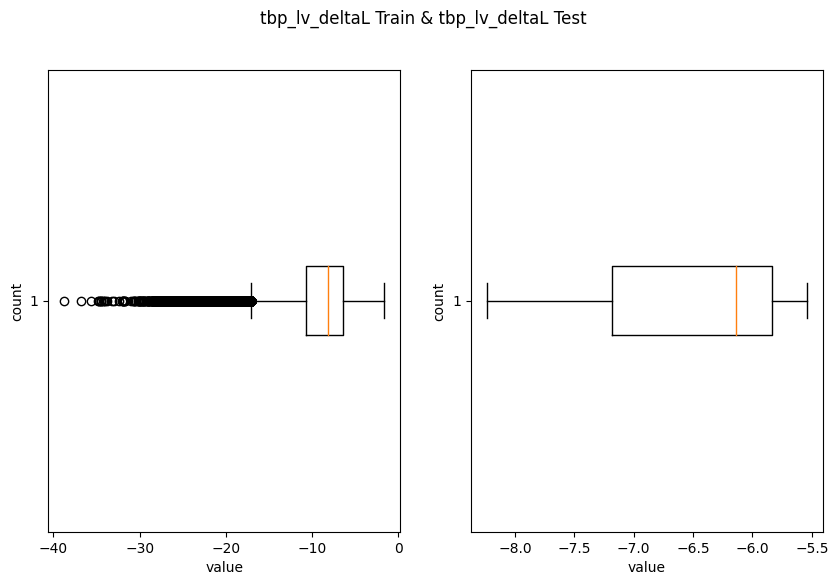

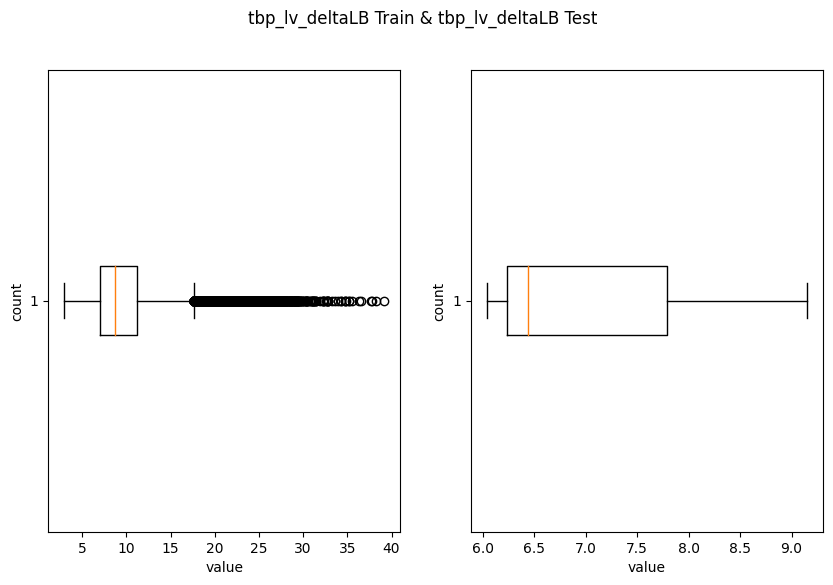

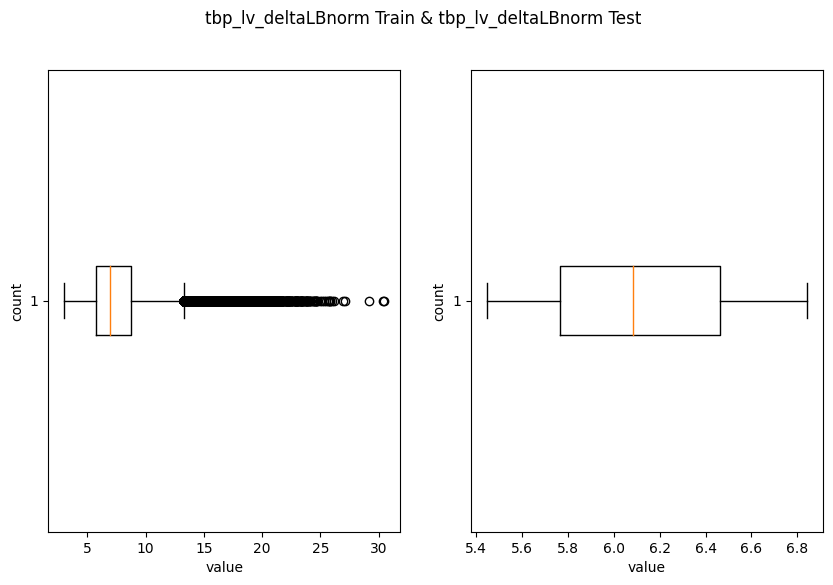

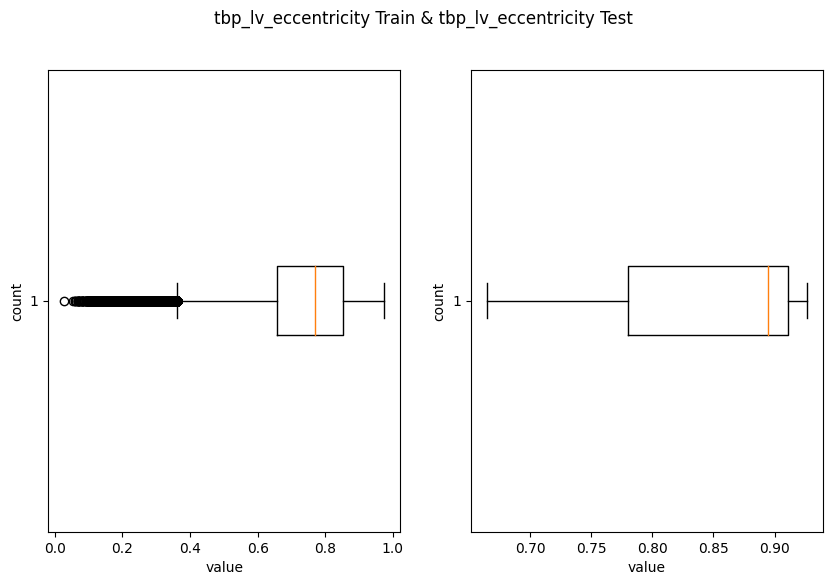

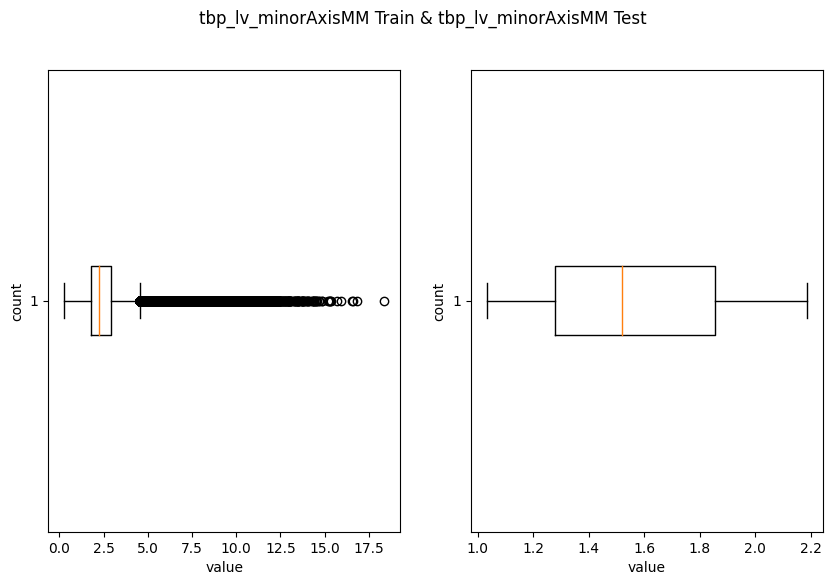

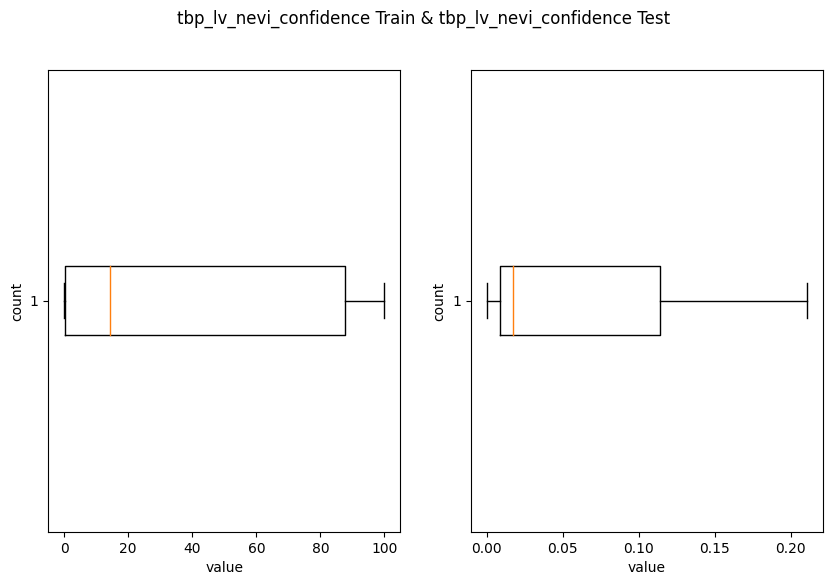

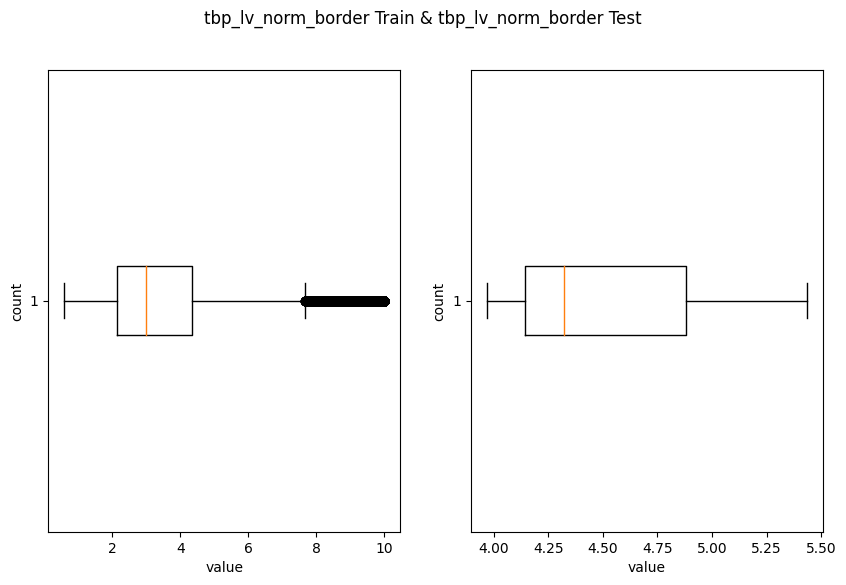

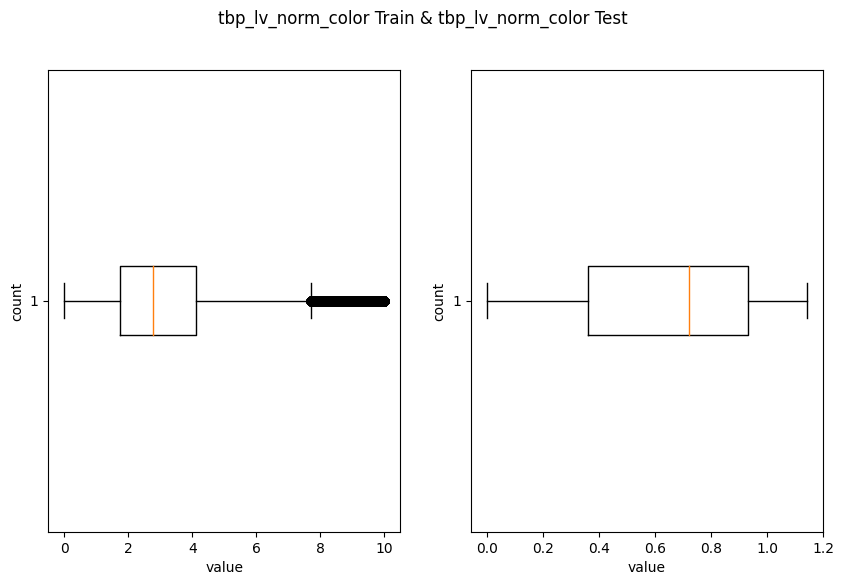

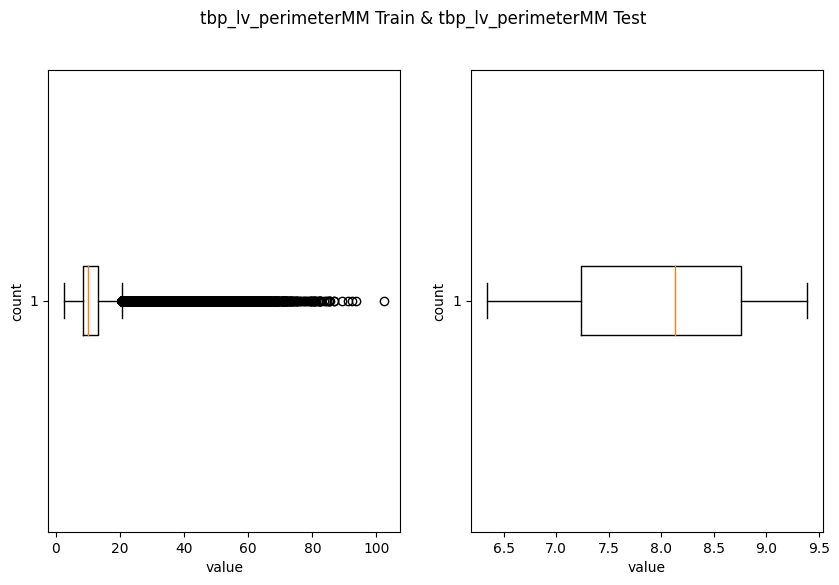

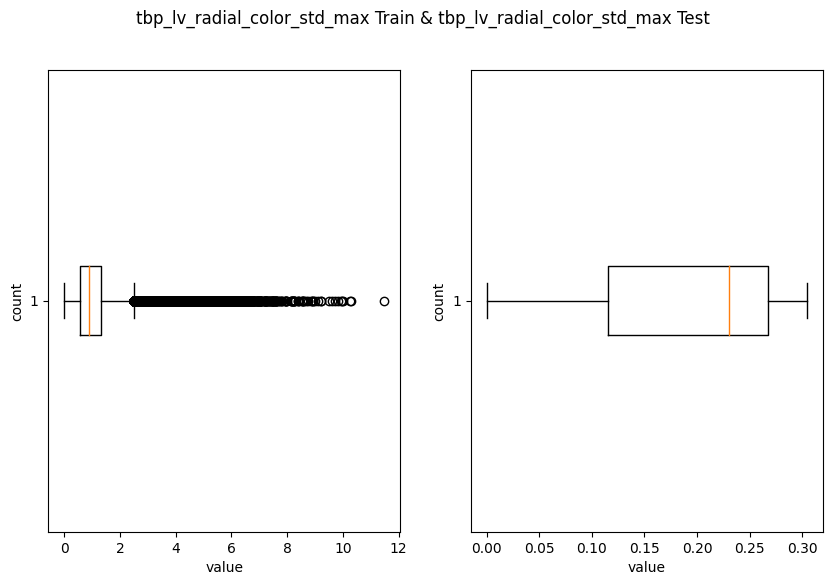

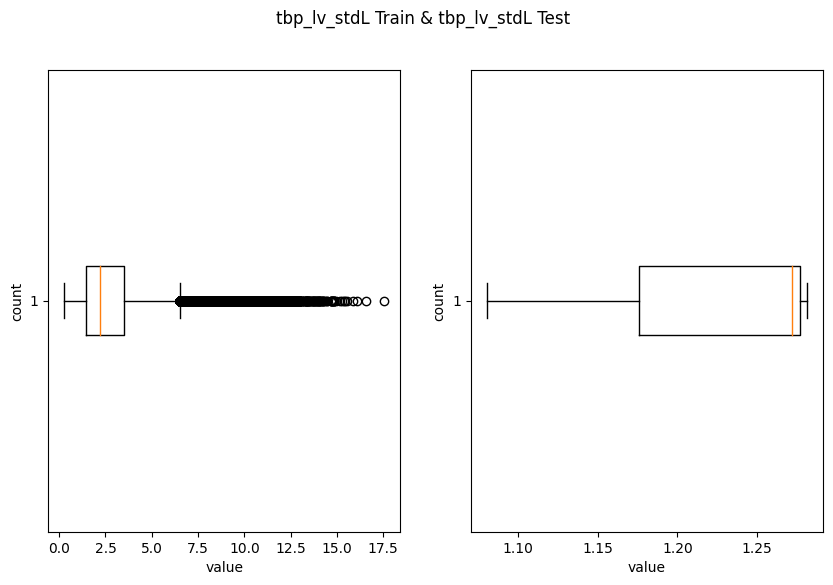

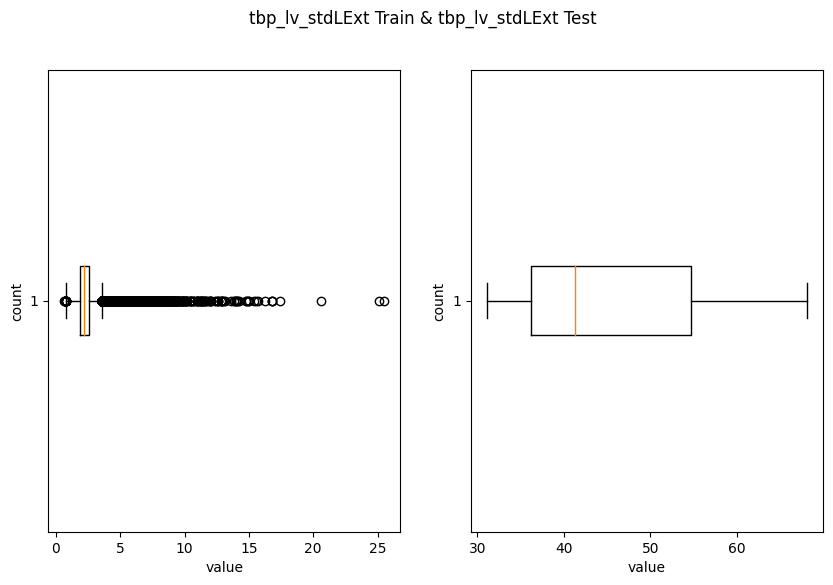

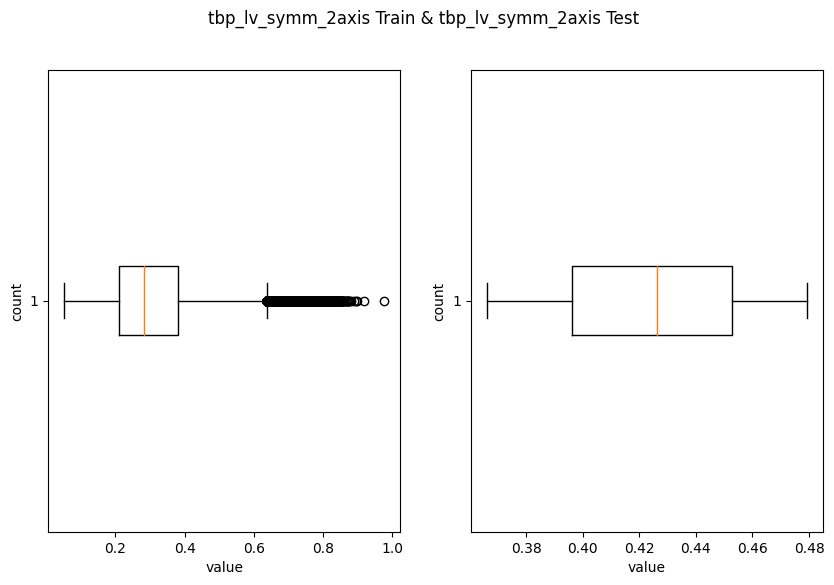

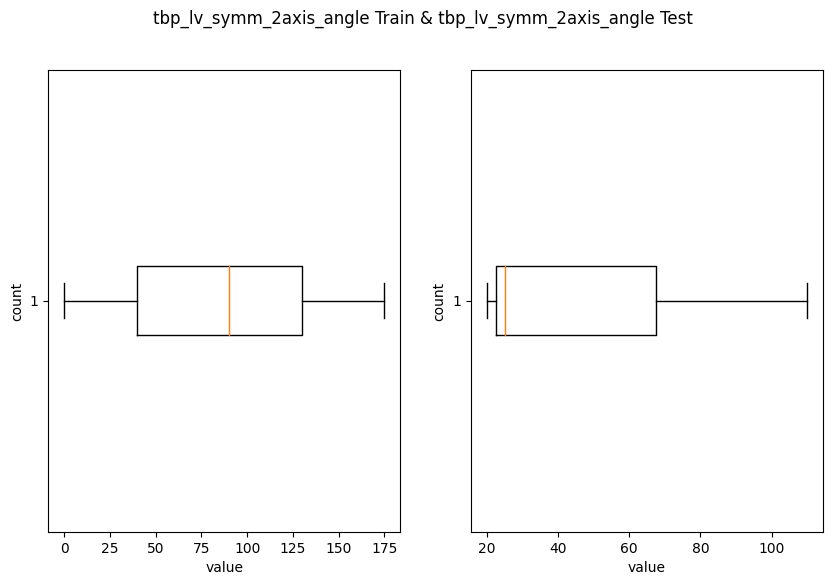

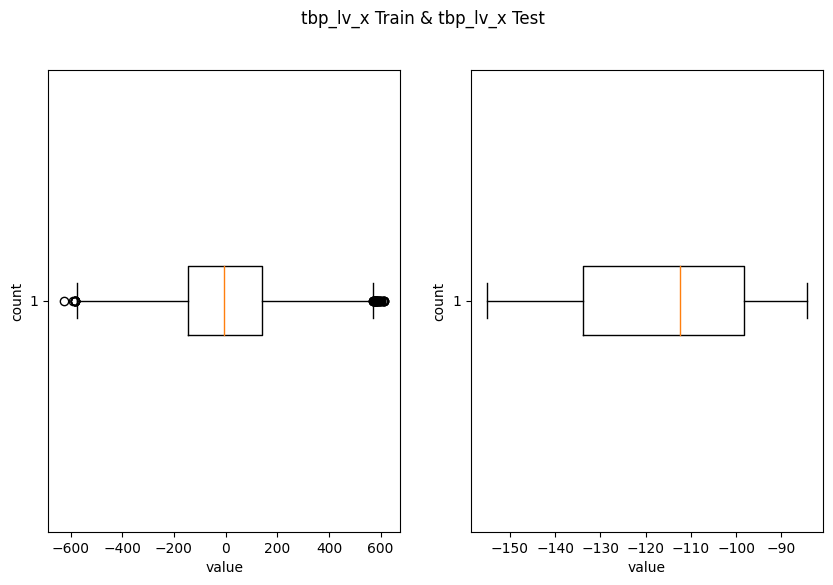

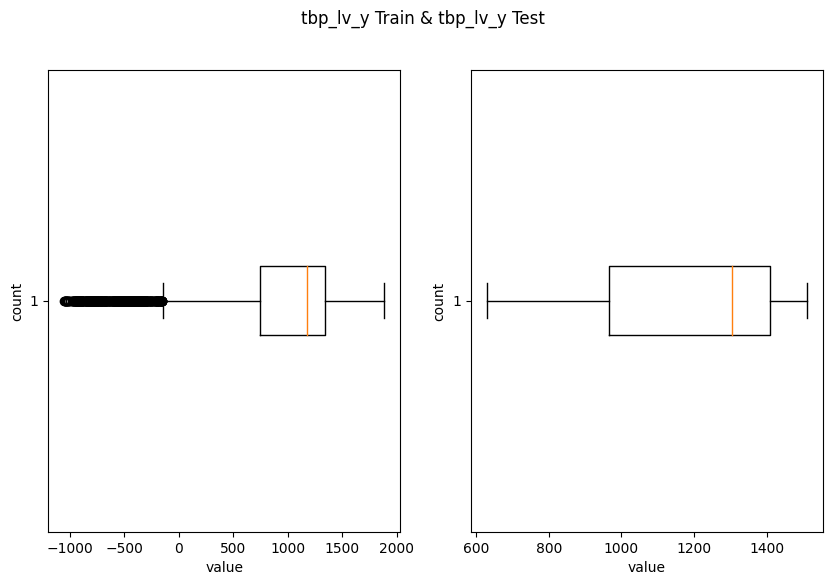

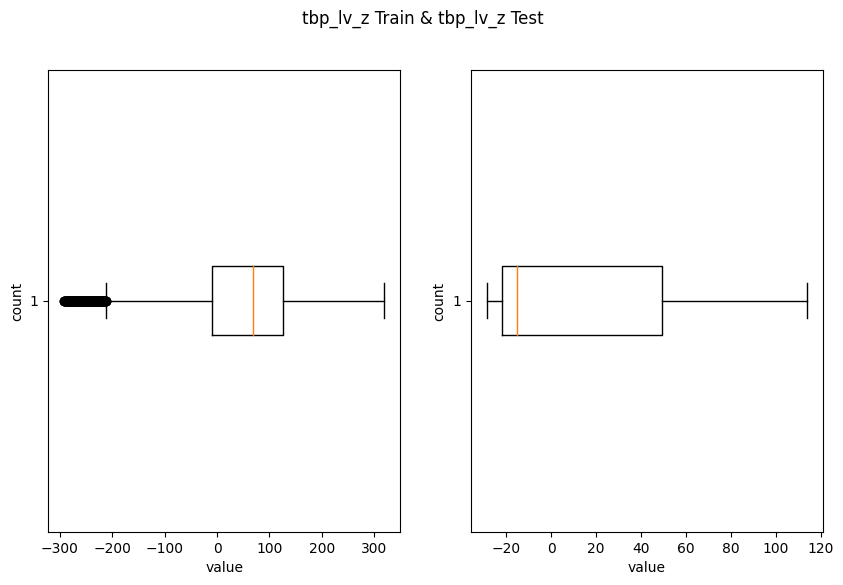

In [57]:
for feature in features_num:
  plt.figure(figsize = (10,6))
  plot1 = plt.subplot(1,2,1)
  plot1.boxplot(df_train[feature].dropna(), vert = False)
  plot1.figure.suptitle(feature + ' Train & ' + feature + ' Test')
  plot1.set(xlabel = 'value', ylabel = 'count')
  plot2 = plt.subplot(1,2,2)
  plot2.boxplot(df_test[feature].dropna(), vert = False)
  plot2.set(xlabel = 'value', ylabel = 'count')
  plt.show()
  print()
  print()

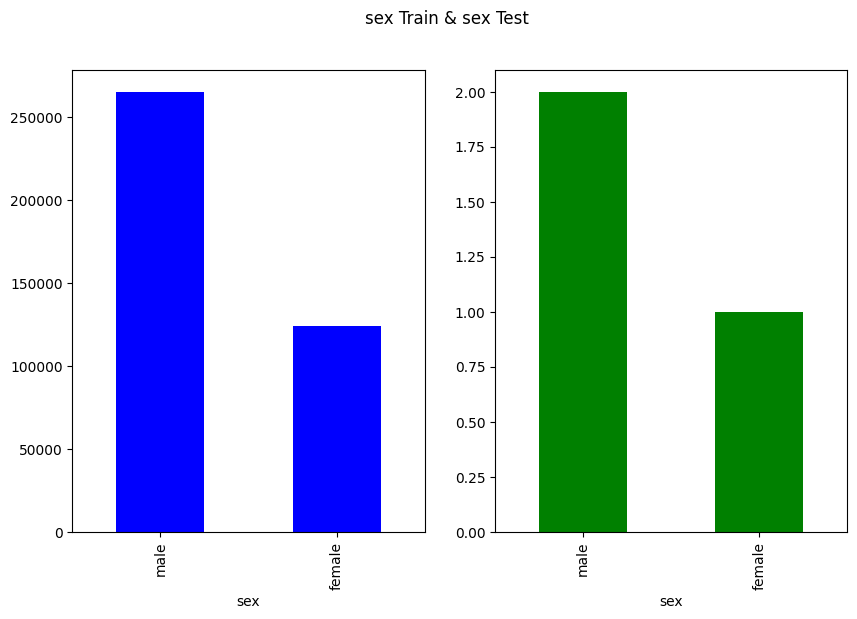

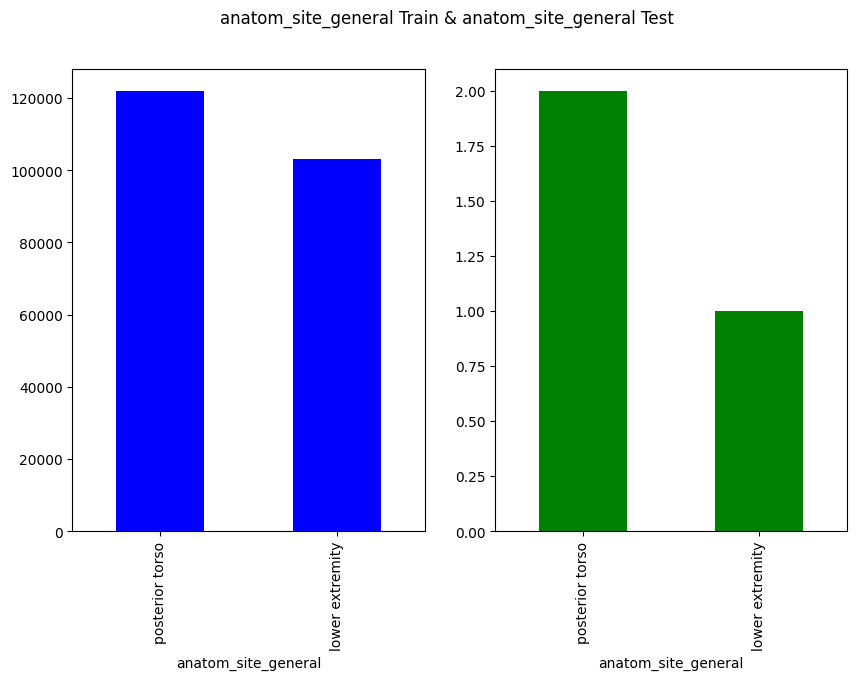

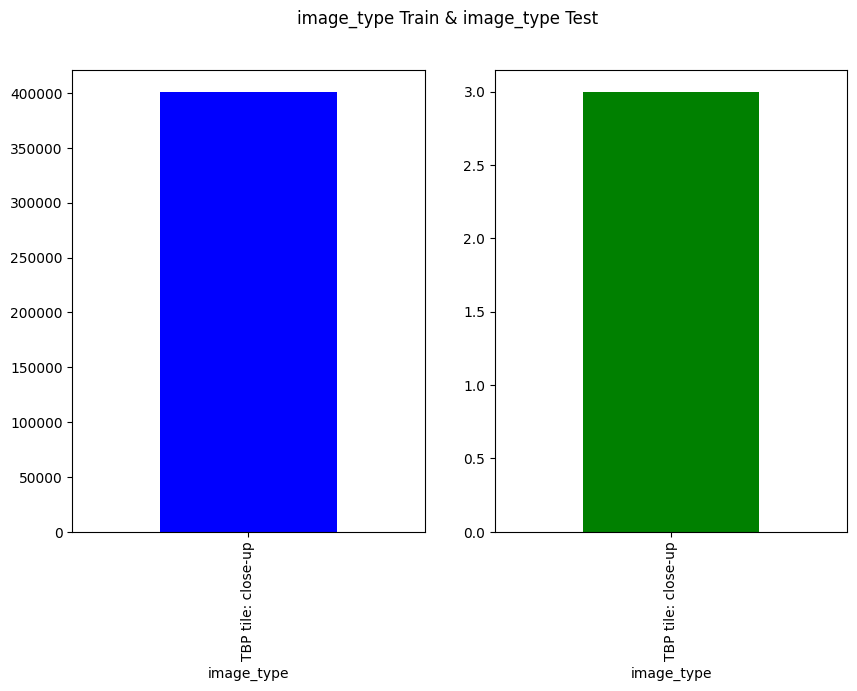

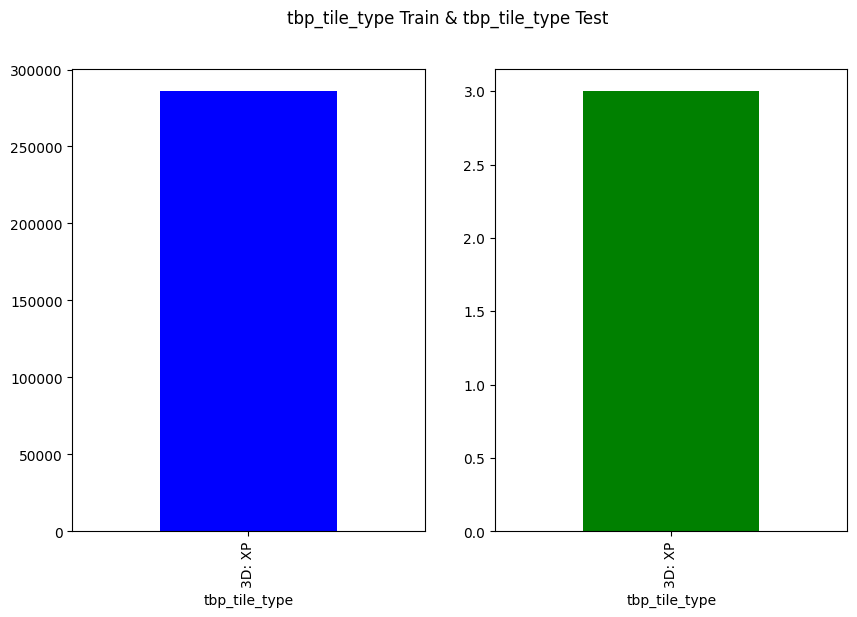

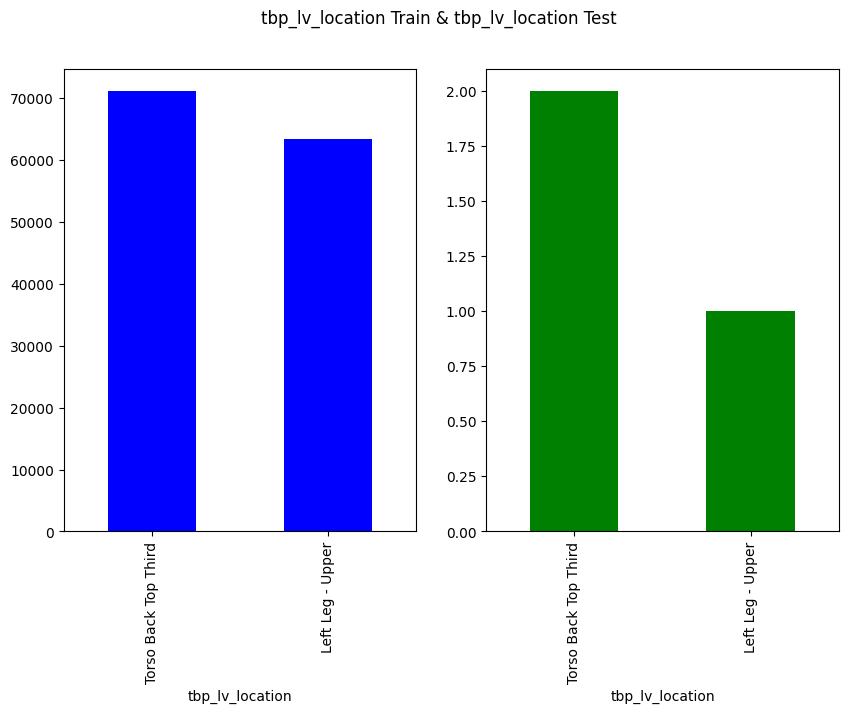

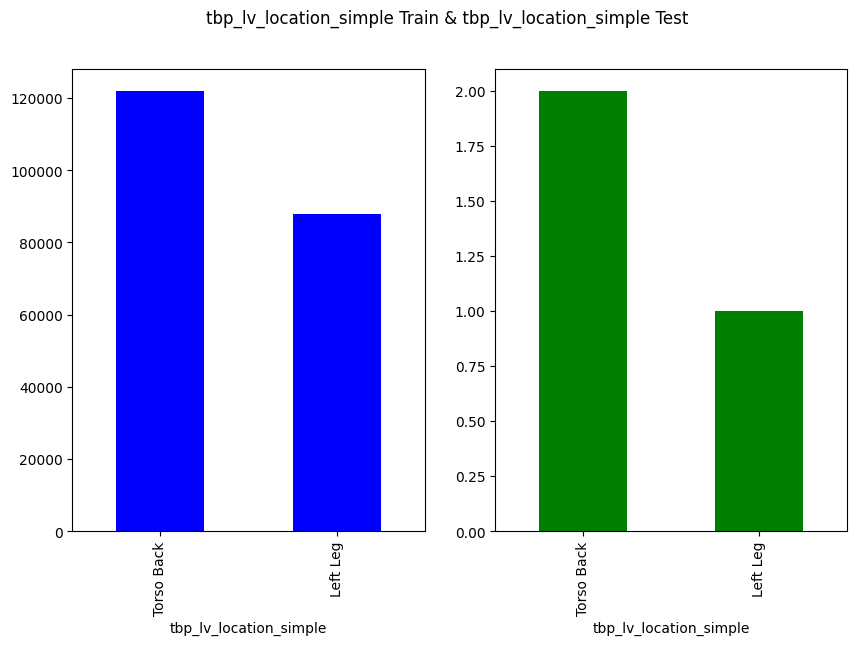

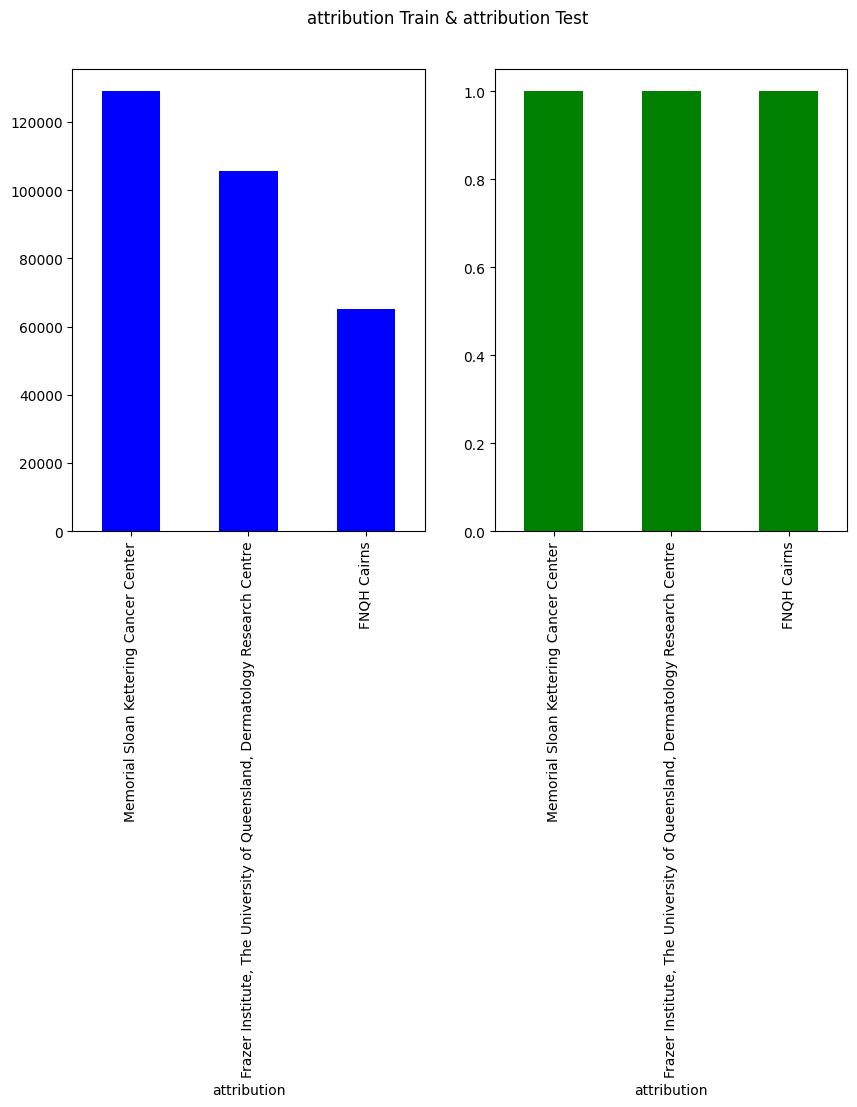

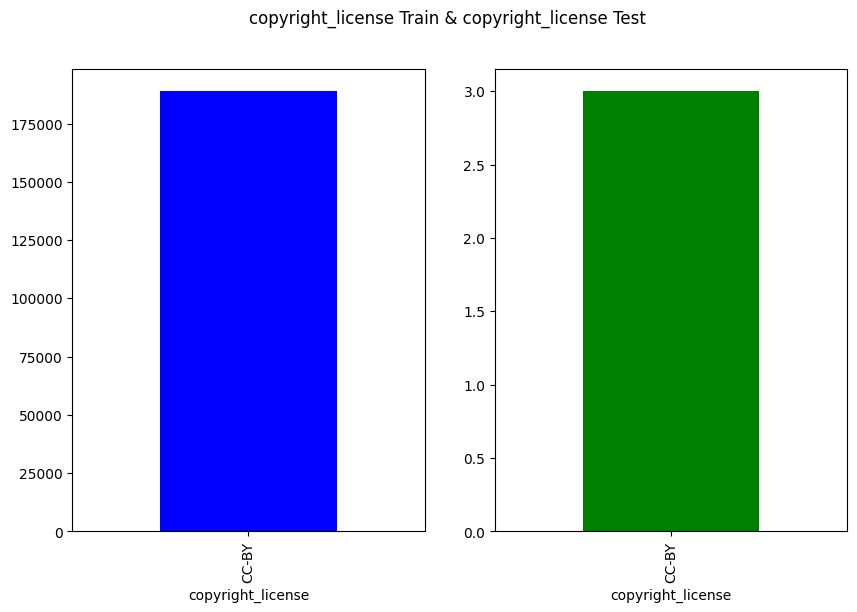

In [55]:
for feature in features_cat:
  plt.figure(figsize = (10,6))
  plot1 = plt.subplot(1,2,1)
  df_train[feature].value_counts().plot(kind = 'bar', color = default_color_1)
  plot1.figure.suptitle(feature + ' Train & ' + feature + ' Test')
  plot2 = plt.subplot(1,2,2, sharex = plot1)
  df_test[feature].value_counts().plot(kind = 'bar', color = default_color_2)
  plt.show()
  print()
  print()

In [58]:
# dropping non-relevant features
features_cat.remove('image_type')
features_cat.remove('tbp_tile_type')
features_cat.remove('copyright_license')

In [59]:
features_num_train = ['mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']
features_cat_train = ['iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index']

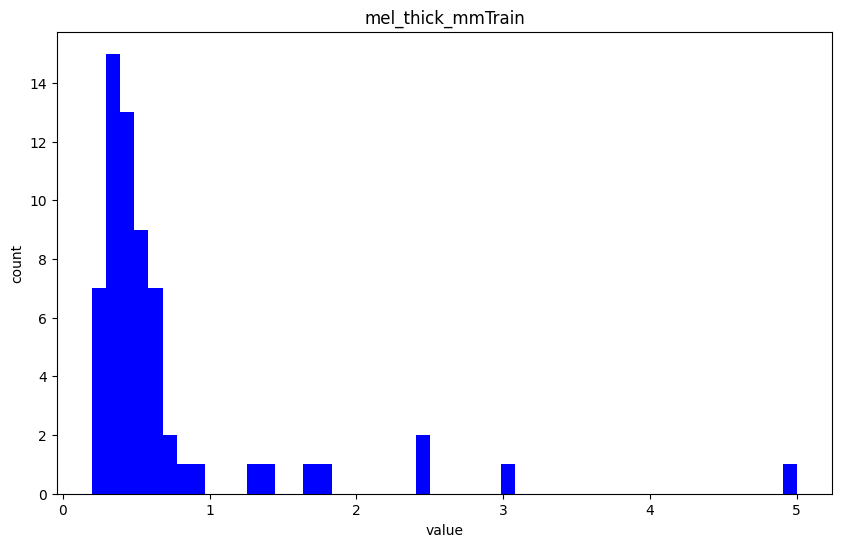

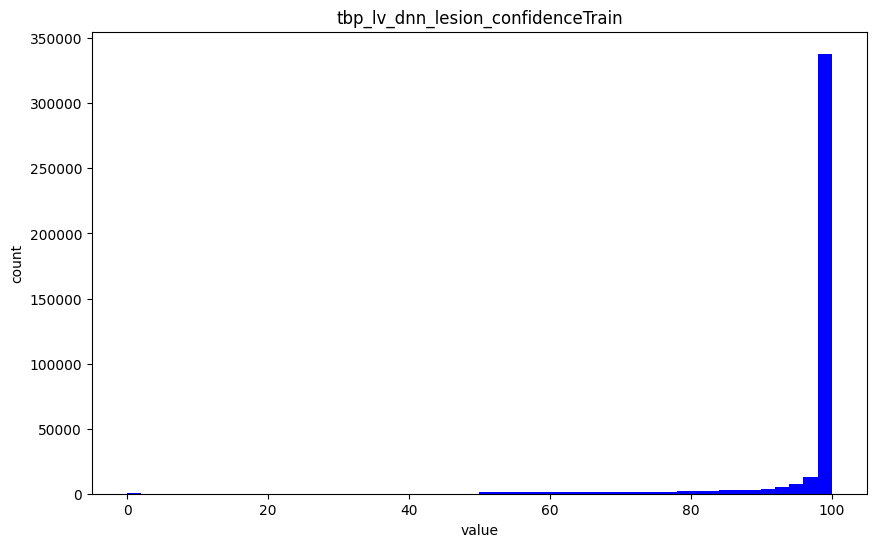

In [62]:
for feature in features_num_train:
  plt.figure(figsize = (10,6))
  plt.hist(df_train[feature], bins = 50, color = default_color_1)
  plt.title(feature + 'Train')
  plt.xlabel('value')
  plt.ylabel('count')
  plt.show()

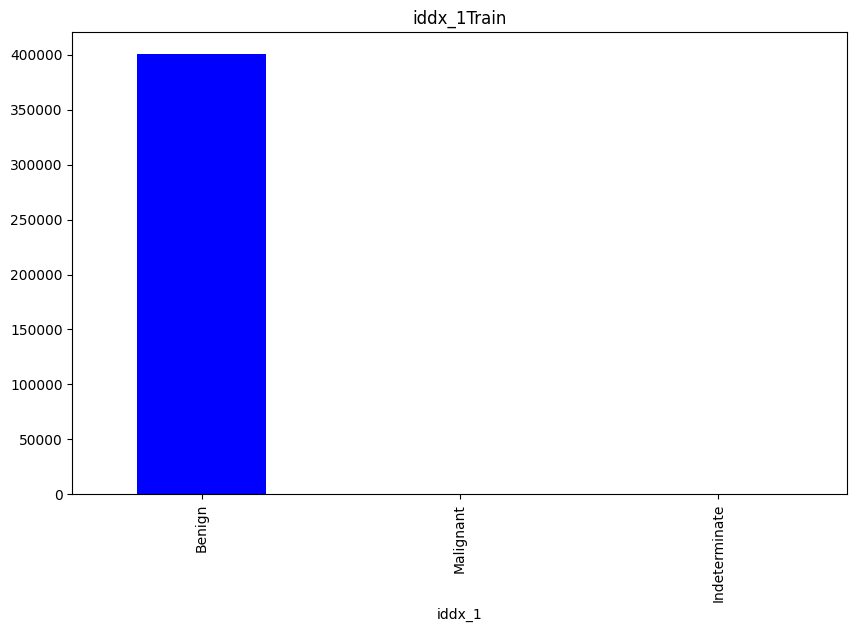

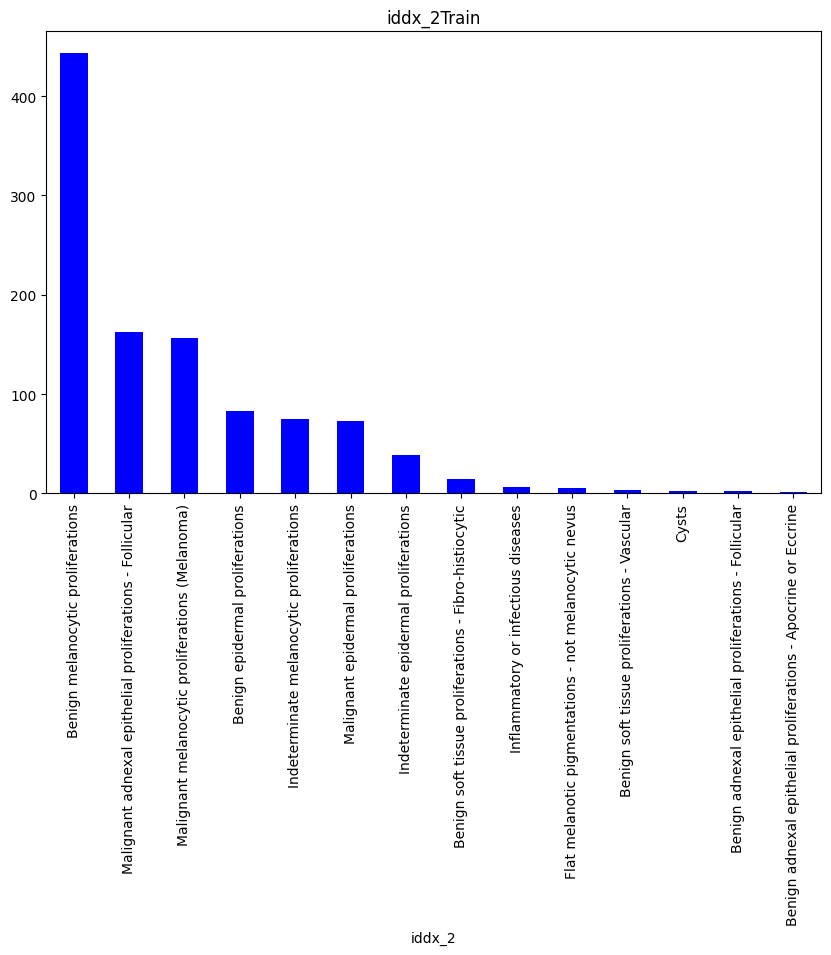

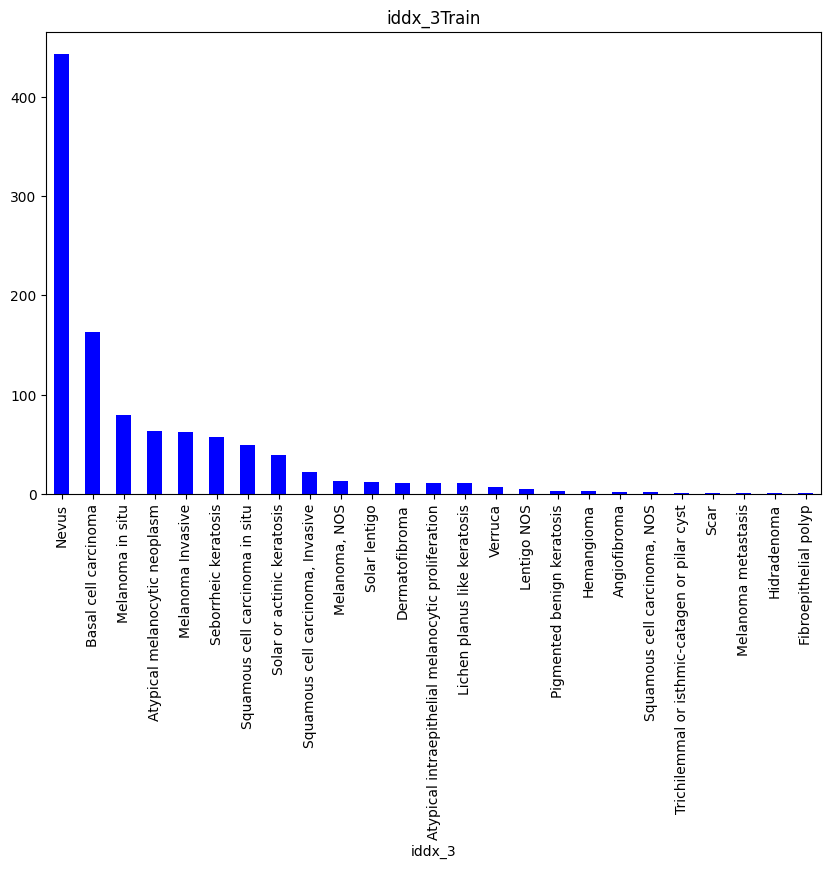

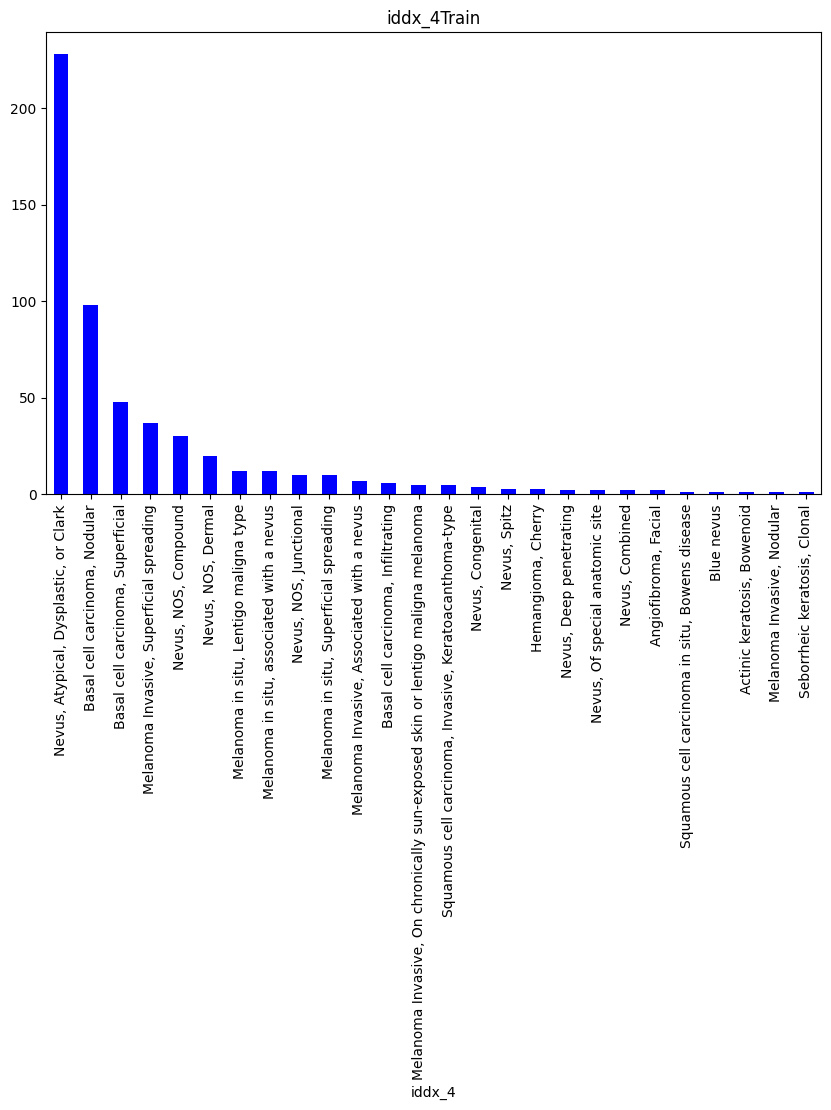

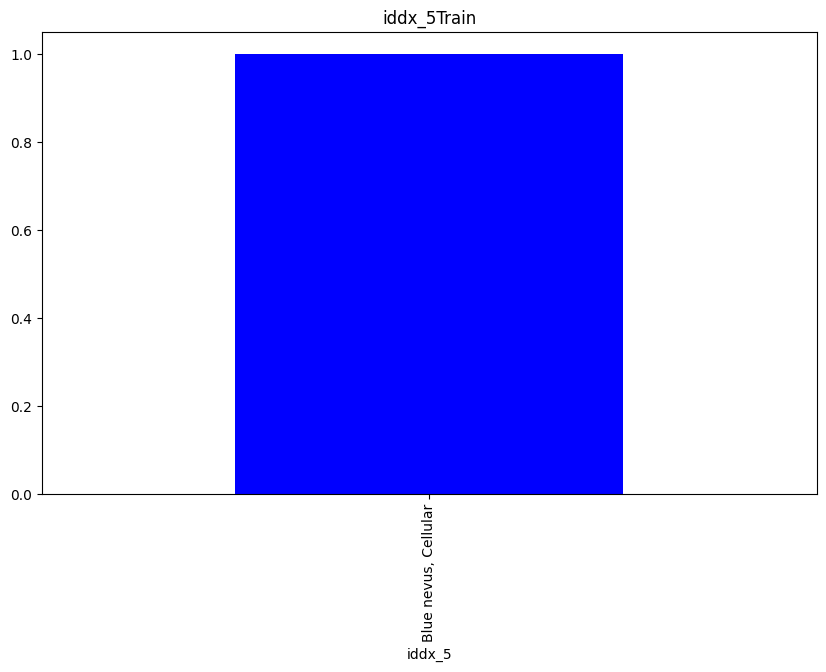

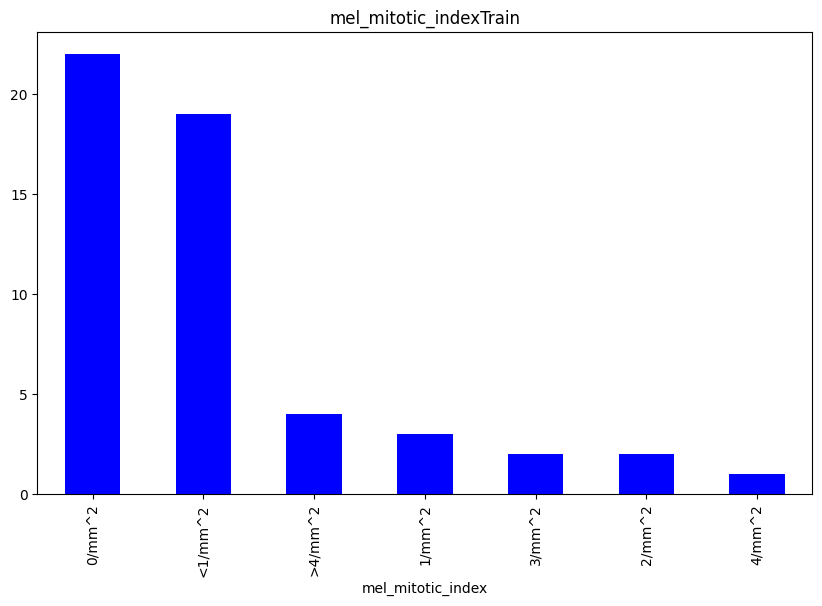

In [66]:
for feature in features_cat_train:
  plt.figure(figsize = (10,6))
  df_train[feature].value_counts().plot(kind = 'bar', color = default_color_1)
  plt.title(feature + 'Train')
  plt.show()
  print()
  print()